## Столкновения транспортных средств - Аварии в Нью-Йорке
Комплексный набор данных о дорожно-транспортных происшествиях в Нью-Йорке (данные с 2012 по 2024 год)

## Описание проекта

## 1. Описание данных

## 2. Загрузка библитек и файлов

### 2.1 Загрузка библитек

In [2]:
# Стандартные импорты plotly
import plotly
import plotly.graph_objs as go
import plotly.express as px

from plotly.subplots import make_subplots
from plotly.offline import iplot

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Загрузка файлов

#### 2.2.1 Загрузка таблицы

In [3]:
# Загрузка файла
# df = pd.read_csv('C:\\Users\\student\\Desktop\\Итоговый проект\\Motor_Vehicle_Collisions_-_Crashes.csv')
df = pd.read_csv('C:\\Users\\Di_Sine\\Desktop\\Итоговый проект\\Motor_Vehicle_Collisions_-_Crashes.csv')

C:\Users\Di_Sine\AppData\Local\Temp\ipykernel_3884\2528419402.py:3: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
# Проверка загрузки файла (первые строки)
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [5]:
# размер таблицы 
df.shape 

(2109802, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109802 entries, 0 to 2109801
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [7]:
df.isna().sum().sort_values()

CRASH DATE                             0
COLLISION_ID                           0
NUMBER OF MOTORIST KILLED              0
NUMBER OF MOTORIST INJURED             0
NUMBER OF CYCLIST KILLED               0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF CYCLIST INJURED              0
CRASH TIME                             0
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
CONTRIBUTING FACTOR VEHICLE 1       7020
VEHICLE TYPE CODE 1                14207
LOCATION                          238615
LONGITUDE                         238615
LATITUDE                          238615
CONTRIBUTING FACTOR VEHICLE 2     329427
VEHICLE TYPE CODE 2               407781
ON STREET NAME                    450495
BOROUGH                           656286
ZIP CODE                          656545
CROSS STREET NAME                 802017
OFF STREET NAME                  1751680
CONTRIBUTING FACTOR VEHICLE 3    1958388
VEHICLE TYPE COD

In [8]:
# Проверка загрузки файла
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109797,08/06/2024,13:53,MANHATTAN,10029.0,NaN,NaN,NaN,NaN,NaN,217 EAST 116 STREET,...,Unspecified,NaN,NaN,NaN,4746035,Sedan,NaN,NaN,NaN,NaN
2109798,08/03/2024,16:30,QUEENS,11372.0,NaN,NaN,NaN,91 STREET,ELMHURST AVENUE,NaN,...,NaN,NaN,NaN,NaN,4746442,Sedan,E-Bike,NaN,NaN,NaN
2109799,07/29/2024,2:30,NaN,NaN,40.723442,-73.938990,"(40.723442, -73.93899)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4746455,Tractor Truck Diesel,Sedan,NaN,NaN,NaN
2109800,08/02/2024,15:48,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4746469,Sedan,Pick-up Truck,NaN,NaN,NaN


**Вывод:** 
* 1) Есть ошибка загрузки файлов, есть вероятность что в одном или нескольких столбцах файла встречаются данные разных типов. 
* 2) Необходимо очистить таблицу от не корректных данных
* 3) Так же подготовить таблицу к дальнейшей работе.

## 3. Предобработка данных

### 3.1 Заголовки столбцов

In [9]:
df.columns # Название столбцов

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [10]:
# Приведем столбцы к нижнему регистру.
df.columns = df.columns.str.lower()
df.sample()

,crash date,crash time,borough,zip code,latitude,longitude,location,on street name,cross street name,off street name,...,contributing factor vehicle 2,contributing factor vehicle 3,contributing factor vehicle 4,contributing factor vehicle 5,collision_id,vehicle type code 1,vehicle type code 2,vehicle type code 3,vehicle type code 4,vehicle type code 5
1232992,11/13/2015,1:16,NaN,NaN,40.801192,-73.930022,"(40.8011922, -73.9300224)",NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3333543,SMALL COM VEH(4 TIRES),PASSENGER VEHICLE,NaN,NaN,NaN


In [11]:
df.columns # Проверка регистра столбцов

Index(['crash date', 'crash time', 'borough', 'zip code', 'latitude',
       'longitude', 'location', 'on street name', 'cross street name',
       'off street name', 'number of persons injured',
       'number of persons killed', 'number of pedestrians injured',
       'number of pedestrians killed', 'number of cyclist injured',
       'number of cyclist killed', 'number of motorist injured',
       'number of motorist killed', 'contributing factor vehicle 1',
       'contributing factor vehicle 2', 'contributing factor vehicle 3',
       'contributing factor vehicle 4', 'contributing factor vehicle 5',
       'collision_id', 'vehicle type code 1', 'vehicle type code 2',
       'vehicle type code 3', 'vehicle type code 4', 'vehicle type code 5'],
      dtype='object')

###  3.2 Перевод столбцов 

In [12]:
# Перевод столбцов для более удобной и понятной работы 
# Перевод значений 
df1 = translation_dict = {
    'crash date': 'Дата аварии',
    'crash time': 'Время аварии',
    'borough': 'Район',
    'zip code': 'Почтовый индекс',
    'latitude': 'Широта',
    'longitude': 'Долгота',
    'location': 'Местоположение',
    'on street name': 'Название улицы',
    'cross street name': 'Название перекрёстка',
    'off street name': 'Название боковой улицы',
    'number of persons injured': 'Количество пострадавших',
    'number of persons killed': 'Количество погибших',
    'number of pedestrians injured': 'Пешеходы пострадавшие',
    'number of pedestrians killed': 'Пешеходы погибшие',
    'number of cyclist injured': 'Велосипедисты пострадавшие',
    'number of cyclist killed': 'Велосипедисты погибшие',
    'number of motorist injured': 'Водители пострадавшие',
    'number of motorist killed': 'Водители погибшие',
    'contributing factor vehicle 1': 'Причина 1',
    'contributing factor vehicle 2': 'Причина 2',
    'contributing factor vehicle 3': 'Причина 3',
    'contributing factor vehicle 4': 'Причина 4',
    'contributing factor vehicle 5': 'Причина 5',
    'collision_id': 'ID столкновения',
    'vehicle type code 1': 'Тип транспорта 1',
    'vehicle type code 2': 'Тип транспорта 2',
    'vehicle type code 3': 'Тип транспорта 3',
    'vehicle type code 4': 'Тип транспорта 4',
    'vehicle type code 5': 'Тип транспорта 5'
}

# Переименование столбцов
df1 = df.rename(columns=translation_dict)
# Вывод значений
print(df1.columns)

Index(['Дата аварии', 'Время аварии', 'Район', 'Почтовый индекс', 'Широта',
       'Долгота', 'Местоположение', 'Название улицы', 'Название перекрёстка',
       'Название боковой улицы', 'Количество пострадавших',
       'Количество погибших', 'Пешеходы пострадавшие', 'Пешеходы погибшие',
       'Велосипедисты пострадавшие', 'Велосипедисты погибшие',
       'Водители пострадавшие', 'Водители погибшие', 'Причина 1', 'Причина 2',
       'Причина 3', 'Причина 4', 'Причина 5', 'ID столкновения',
       'Тип транспорта 1', 'Тип транспорта 2', 'Тип транспорта 3',
       'Тип транспорта 4', 'Тип транспорта 5'],
      dtype='object')


###  3.3 Дубликаты и пропуски

In [13]:
df1.duplicated().sum() # проверка на явные дубликаты

np.int64(0)

In [14]:
df1.isnull().sum().sum() # всего пропусков в DataFrame

np.int64(18067226)

In [15]:
# кол-во пропущеных значений
df1.isnull().sum().sort_values(ascending=False)

Тип транспорта 5              2100776
Причина 5                     2100491
Тип транспорта 4              2076712
Причина 4                     2075501
Тип транспорта 3              1964006
Причина 3                     1958388
Название боковой улицы        1751680
Название перекрёстка           802017
Почтовый индекс                656545
Район                          656286
Название улицы                 450495
Тип транспорта 2               407781
Причина 2                      329427
Местоположение                 238615
Долгота                        238615
Широта                         238615
Тип транспорта 1                14207
Причина 1                        7020
Количество погибших                31
Количество пострадавших            18
ID столкновения                     0
Дата аварии                         0
Водители погибшие                   0
Водители пострадавшие               0
Велосипедисты погибшие              0
Время аварии                        0
Пешеходы пог

In [16]:
# % пропущеных значений
print(round(df1.isnull().sum () / len(df)* 100).sort_values(ascending=False))

Тип транспорта 5              100.0
Причина 5                     100.0
Тип транспорта 4               98.0
Причина 4                      98.0
Тип транспорта 3               93.0
Причина 3                      93.0
Название боковой улицы         83.0
Название перекрёстка           38.0
Почтовый индекс                31.0
Район                          31.0
Название улицы                 21.0
Тип транспорта 2               19.0
Причина 2                      16.0
Местоположение                 11.0
Долгота                        11.0
Широта                         11.0
Тип транспорта 1                1.0
ID столкновения                 0.0
Дата аварии                     0.0
Причина 1                       0.0
Водители погибшие               0.0
Водители пострадавшие           0.0
Велосипедисты погибшие          0.0
Время аварии                    0.0
Пешеходы погибшие               0.0
Пешеходы пострадавшие           0.0
Количество погибших             0.0
Количество пострадавших     

Итог:
* Тип транспорта 5 и Причина 5
* -   100.0 % пропущеных значений
* Тип транспорта 4 и Причина 4
* -    98.0 % пропущеных значений
* Тип транспорта 3 и Причина 3
* -    93.0 % пропущеных значений
* Название боковой улицы
* -    83.0 % пропущеных значений
* Название перекрёстка
* -    38.0 % пропущеных значений
* Почтовый индекс и Район
* -    31.0 % пропущеных значений
* Название улицы
* -    21.0 % пропущеных значений
* Тип транспорта 2 и Причина 2
* -    16.0 % пропущеных значений
* Местоположение, Долгота и Широта
* -    11.0 % пропущеных значений
* Тип транспорта 1
* -     1.0 % пропущеных значений

Больше всего пропусков в типе транспорта и причине 5, 4 и 3 численности участия в ДТП. Затем следует Название боковой улицы что нарушает анализ процентом пропусков более 50%.
После название перекрёстка, почтовый индекс и район.


#### 3.2.1 Удаление пропусков и дубликатов

In [17]:
# Удаляем столбцы, где все значения пустые
df_cleaned = df1.dropna(axis=1, how='all')
# Выводим таблицу с удалёнными столбцами
print(df_cleaned)

        Дата аварии Время аварии      Район Почтовый индекс     Широта  \
0        09/11/2021         2:39        NaN             NaN        NaN   
1        03/26/2022        11:45        NaN             NaN        NaN   
2        06/29/2022         6:55        NaN             NaN        NaN   
3        09/11/2021         9:35   BROOKLYN         11208.0  40.667202   
4        12/14/2021         8:13   BROOKLYN         11233.0  40.683304   
...             ...          ...        ...             ...        ...   
2109797  08/06/2024        13:53  MANHATTAN         10029.0        NaN   
2109798  08/03/2024        16:30     QUEENS         11372.0        NaN   
2109799  07/29/2024         2:30        NaN             NaN  40.723442   
2109800  08/02/2024        15:48        NaN             NaN        NaN   
2109801  08/06/2024        12:46        NaN             NaN        NaN   

           Долгота           Местоположение              Название улицы  \
0              NaN                  

In [18]:
df2 = df1.drop(columns=[
    'Тип транспорта 5',
    'Причина 5',
    'Тип транспорта 4',
    'Причина 4',
    'Тип транспорта 3',
    'Причина 3',
    'Название боковой улицы'
])

In [19]:
df2 # Таблица с удалёнными значениями нарущающие балланс чистоты анализа

,Дата аварии,Время аварии,Район,Почтовый индекс,Широта,Долгота,Местоположение,Название улицы,Название перекрёстка,Количество пострадавших,...,Пешеходы погибшие,Велосипедисты пострадавшие,Велосипедисты погибшие,Водители пострадавшие,Водители погибшие,Причина 1,Причина 2,ID столкновения,Тип транспорта 1,Тип транспорта 2
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,...,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,...,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,...,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,...,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109797,08/06/2024,13:53,MANHATTAN,10029.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,4746035,Sedan,NaN
2109798,08/03/2024,16:30,QUEENS,11372.0,NaN,NaN,NaN,91 STREET,ELMHURST AVENUE,0.0,...,0,0,0,0,0,Unspecified,NaN,4746442,Sedan,E-Bike
2109799,07/29/2024,2:30,NaN,NaN,40.723442,-73.938990,"(40.723442, -73.93899)",BROOKLYN QUEENS EXPRESSWAY,NaN,0.0,...,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,4746455,Tractor Truck Diesel,Sedan
2109800,08/02/2024,15:48,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4746469,Sedan,Pick-up Truck


### 3.3 Выбор столбцов для анализа

#### 3.3.1 Таблица 1. Время аварии

In [20]:
# Выбираем столбцы для таблицы 1
t1= df2.loc[:,['Дата аварии','Время аварии']]

In [21]:
# Таблица 1
# Дата и время
t1

,Дата аварии,Время аварии
0,09/11/2021,2:39
1,03/26/2022,11:45
2,06/29/2022,6:55
3,09/11/2021,9:35
4,12/14/2021,8:13
...,...,...
2109797,08/06/2024,13:53
2109798,08/03/2024,16:30
2109799,07/29/2024,2:30
2109800,08/02/2024,15:48


#### 3.3.2 Таблица 2. Причина аварии

In [22]:
# Выбираем столбцы для таблицы 2
t2= df2.loc[:,['Причина 1','Причина 2']]

In [23]:
# Таблица 2
# очиска значений NaN и вывод таблицы
t21 = t2.dropna()

In [24]:
t21

,Причина 1,Причина 2
0,Aggressive Driving/Road Rage,Unspecified
2,Following Too Closely,Unspecified
5,Unspecified,Unspecified
6,Passing Too Closely,Unspecified
7,Unspecified,Unspecified
...,...,...
2109796,Passenger Distraction,Unsafe Speed
2109797,Driver Inattention/Distraction,Unspecified
2109799,Passing or Lane Usage Improper,Unspecified
2109800,Following Too Closely,Unspecified


#### 3.3.3 Таблица 3. Тип транспорта

In [25]:
# Выбираем столбцы для таблицы 3
t3= df2.loc[:,['Тип транспорта 1','Тип транспорта 2']]

In [26]:
# Таблица 3
# очиска значений NaN и вывод таблицы
t31 = t3.dropna()

In [27]:
t31

,Тип транспорта 1,Тип транспорта 2
0,Sedan,Sedan
2,Sedan,Pick-up Truck
5,Dump,Sedan
6,Sedan,Tractor Truck Diesel
7,Sedan,Sedan
...,...,...
2109796,Taxi,Bike
2109798,Sedan,E-Bike
2109799,Tractor Truck Diesel,Sedan
2109800,Sedan,Pick-up Truck


#### 3.3.4 Таблица 4. Место происшествия

In [28]:
# Выбираем столбцы для таблицы 4
t4= df2.loc[:,['Местоположение','Название улицы','Название перекрёстка']]

In [29]:
# Таблица 4
# очиска значений NaN и вывод таблицы
t41 = t4.dropna()

In [30]:
t41

,Местоположение,Название улицы,Название перекрёстка
4,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET
9,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET
11,"(40.675884, -73.75577)",SPRINGFIELD BOULEVARD,EAST GATE PLAZA
14,"(40.66684, -73.78941)",NORTH CONDUIT AVENUE,150 STREET
18,"(40.87262, -73.904686)",WEST KINGSBRIDGE ROAD,HEATH AVENUE
...,...,...,...
2109635,"(40.812263, -73.92059)",WILLIS AVENUE,EAST 143 STREET
2109667,"(40.675735, -73.89686)",ATLANTIC AVENUE,PENNSYLVANIA AVENUE
2109755,"(40.804153, -73.91304)",BRUCKNER BOULEVARD,EAST 137 STREET
2109765,"(40.68476, -73.75663)",LUCAS STREET,122 AVENUE


#### 3.3.5 Таблица 5. Количество погибших и пострадавших

In [31]:
# Выбираем столбцы для таблицы 5
t5= df2.loc[:,['Дата аварии','Количество пострадавших','Количество погибших', 'Пешеходы пострадавшие', 'Пешеходы погибшие','Велосипедисты пострадавшие', 'Велосипедисты погибшие','Водители пострадавшие', 'Водители погибшие']]

In [32]:
# Таблица 5
# очиска значений NaN и вывод таблицы
t51 = t5.dropna()

In [33]:
t51

,Дата аварии,Количество пострадавших,Количество погибших,Пешеходы пострадавшие,Пешеходы погибшие,Велосипедисты пострадавшие,Велосипедисты погибшие,Водители пострадавшие,Водители погибшие
0,09/11/2021,2.0,0.0,0,0,0,0,2,0
1,03/26/2022,1.0,0.0,0,0,0,0,1,0
2,06/29/2022,0.0,0.0,0,0,0,0,0,0
3,09/11/2021,0.0,0.0,0,0,0,0,0,0
4,12/14/2021,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2109797,08/06/2024,0.0,0.0,0,0,0,0,0,0
2109798,08/03/2024,0.0,0.0,0,0,0,0,0,0
2109799,07/29/2024,0.0,0.0,0,0,0,0,0,0
2109800,08/02/2024,0.0,0.0,0,0,0,0,0,0


#### 3.3.6 Таблица 6. Распределение данных по годам

In [34]:
# Выбираем столбцы для таблицы 6
t6= df2.loc[:,['Дата аварии','Количество пострадавших','Количество погибших']]

In [35]:
# Таблица 6
# очиска значений NaN и вывод таблицы
t61 = t6.dropna()

In [36]:
t61

,Дата аварии,Количество пострадавших,Количество погибших
0,09/11/2021,2.0,0.0
1,03/26/2022,1.0,0.0
2,06/29/2022,0.0,0.0
3,09/11/2021,0.0,0.0
4,12/14/2021,0.0,0.0
...,...,...,...
2109797,08/06/2024,0.0,0.0
2109798,08/03/2024,0.0,0.0
2109799,07/29/2024,0.0,0.0
2109800,08/02/2024,0.0,0.0


## 4. Исследовательский анализ данных

### 4.1 Время аварии

In [96]:
# Преобразуем столбец в datetime, указывая формат ММ/ДД/ГГГГ
t1['Дата аварии'] = pd.to_datetime(t1['Дата аварии'], format="%m/%d/%Y", errors='coerce')

# Проверим результат
print(t1)
print(t1.dtypes)

        Дата аварии Время аварии
0        2021-09-11         2:39
1        2022-03-26        11:45
2        2022-06-29         6:55
3        2021-09-11         9:35
4        2021-12-14         8:13
...             ...          ...
2109797  2024-08-06        13:53
2109798  2024-08-03        16:30
2109799  2024-07-29         2:30
2109800  2024-08-02        15:48
2109801  2024-08-06        12:46

[2109802 rows x 2 columns]
Дата аварии     datetime64[ns]
Время аварии            object
dtype: object


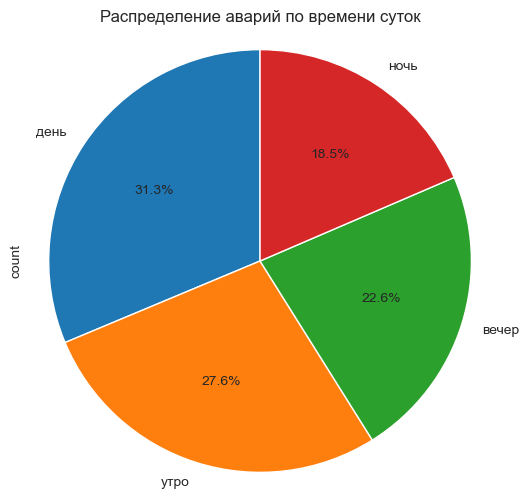

In [97]:
# Создадим функцию для определения времени суток
def get_time_segment(time_str):
    hour = int(time_str.split(':')[0])
    if 5 <= hour < 12:
        return 'утро'
    elif 12 <= hour < 17:
        return 'день'
    elif 17 <= hour < 21:
        return 'вечер'
    else:
        return 'ночь'

# Применяем функцию к колонке времени
df2['Время аварии'] = df2['Время аварии'].apply(get_time_segment)

# Подсчитываем количество аварий по сегментам
counts = df2['Время аварии'].value_counts()

# Строим круговую диаграмму
plt.figure(figsize=(6, 6))
counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=counts.index)
plt.title('Распределение аварий по времени суток')
plt.axis('equal')
plt.show()

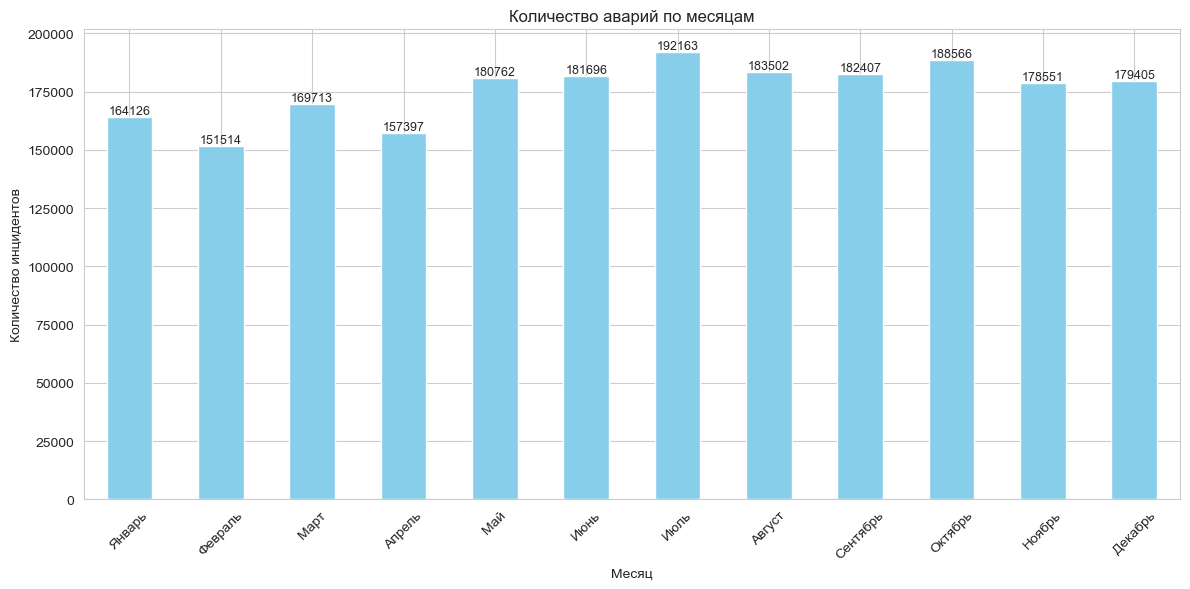

In [99]:
# Извлекаем номер месяца
t1['Месяц_номер'] = t1['Дата аварии'].dt.month

# Создаем словарь для перевода месяцев на русский
month_translation = {
    1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель',
    5: 'Май', 6: 'Июнь', 7: 'Июль', 8: 'Август',
    9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'
}

# Добавляем столбец с русскими названиями месяцев
t1['Месяц'] = t1['Месяц_номер'].map(month_translation)

# Делаем месяц категориальным с правильным порядком
t1['Месяц'] = pd.Categorical(t1['Месяц'], categories=list(month_translation.values()), ordered=True)

# Подсчитываем количество по месяцам
counts = t1['Месяц'].value_counts().sort_index()

# Строим диаграмму
plt.figure(figsize=(12, 6))  # Немного увеличил размер для лучшего отображения подписей
ax = counts.plot.bar(color='skyblue')
plt.title('Количество аварий по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество инцидентов')
plt.xticks(rotation=45)

# Добавляем подписи над столбцами
for i, v in enumerate(counts):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### 4.2 Причина аварии

In [37]:
t21

,Причина 1,Причина 2
0,Aggressive Driving/Road Rage,Unspecified
2,Following Too Closely,Unspecified
5,Unspecified,Unspecified
6,Passing Too Closely,Unspecified
7,Unspecified,Unspecified
...,...,...
2109796,Passenger Distraction,Unsafe Speed
2109797,Driver Inattention/Distraction,Unspecified
2109799,Passing or Lane Usage Improper,Unspecified
2109800,Following Too Closely,Unspecified


In [38]:
# Лист значений из столбца
unique_values_list = t21['Причина 1'].unique().tolist()
print(unique_values_list)

['Aggressive Driving/Road Rage', 'Following Too Closely', 'Unspecified', 'Passing Too Closely', 'Driver Inexperience', 'Passing or Lane Usage Improper', 'Turning Improperly', 'Unsafe Lane Changing', 'Reaction to Uninvolved Vehicle', 'Traffic Control Disregarded', 'Other Vehicular', 'Driver Inattention/Distraction', 'Oversized Vehicle', 'Alcohol Involvement', 'View Obstructed/Limited', 'Unsafe Speed', 'Failure to Yield Right-of-Way', 'Lost Consciousness', 'Brakes Defective', 'Backing Unsafely', 'Glare', 'Passenger Distraction', 'Fell Asleep', 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion', 'Animals Action', 'Steering Failure', 'Drugs (illegal)', 'Pavement Slippery', 'Other Lighting Defects', 'Obstruction/Debris', 'Outside Car Distraction', 'Tire Failure/Inadequate', 'Pavement Defective', 'Illnes', 'Fatigued/Drowsy', 'Failure to Keep Right', 'Physical Disability', 'Driverless/Runaway Vehicle', 'Eating or Drinking', 'Tinted Windows', 'Cell Phone (hands-free)', 'Lane Marking Impro

In [39]:
# Копия среза
t21 = t21.copy()

# Перевод значений стобца 1
translation_dict = {
    'Aggressive Driving/Road Rage': 'Агрессивное вождение/Дорожная ярость',
    'Following Too Closely': 'Слишком близкое следование',
    'Unspecified': 'Неуточнено',
    'Passing Too Closely': 'Опасный обгон',
    'Driver Inexperience': 'Неопытный водитель',
    'Passing or Lane Usage Improper': 'Неправильный обгон или использование полосы',
    'Turning Improperly': 'Неправильный поворот',
    'Unsafe Lane Changing': 'Опасное перестроение',
    'Reaction to Uninvolved Vehicle': 'Реакция на другое транспортное средство',
    'Traffic Control Disregarded': 'Несоблюдение правил дорожного движения',
    'Other Vehicular': 'Другие транспортные',
    'Driver Inattention/Distraction': 'Невнимательность/Отвлечение водителя',
    'Oversized Vehicle': 'Транспортное средство большого размера',
    'Alcohol Involvement': 'Употребление алкоголя',
    'View Obstructed/Limited': 'Ограничение видимости',
    'Unsafe Speed': 'Небезопасная скорость',
    'Failure to Yield Right-of-Way': 'Невыполнение требования уступить дорогу',
    'Lost Consciousness': 'Потеря сознания',
    'Brakes Defective': 'Неисправные тормоза',
    'Backing Unsafely': 'Опасный задний ход',
    'Glare': 'Слепящий свет',
    'Passenger Distraction': 'Отвлечение пассажира',
    'Fell Asleep': 'Заснул за рулём',
    'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 'Ошибка/замешательство пешехода или велосипедиста',
    'Animals Action': 'Действия животных',
    'Steering Failure': 'Отказ рулевого управления',
    'Drugs (illegal)': 'Наркотики (незаконные)',
    'Pavement Slippery': 'Скользкое покрытие',
    'Other Lighting Defects': 'Другие дефекты освещения',
    'Obstruction/Debris': 'Препятствия/загрязнения',
    'Outside Car Distraction': 'Отвлечение вне автомобиля',
    'Tire Failure/Inadequate': 'Неисправность/недостаточное состояние шин',
    'Pavement Defective': 'Дефекты покрытия',
    'Illnes': 'Болезнь',
    'Fatigued/Drowsy': 'Усталость/сонливость',
    'Failure to Keep Right': 'Нарушение правила движения справа',
    'Physical Disability': 'Физическая неполноценность',
    'Driverless/Runaway Vehicle': 'Безводитель/Неформальный транспорт',
    'Eating or Drinking': 'Приём пищи или напитков',
    'Tinted Windows': 'Тонированные стекла',
    'Cell Phone (hands-free)': 'Телефон (с гарнитурой)',
    'Lane Marking Improper/Inadequate': 'Неправильная/недостаточная разметка',
    'Headlights Defective': 'Неисправные фары',
    'Other Electronic Device': 'Другие электронные устройства',
    'Using On Board Navigation Device': 'Использование навигационного устройства',
    'Accelerator Defective': 'Неисправен акселератор',
    'Cell Phone (hand-Held)': 'Телефон (в руках)',
    'Traffic Control Device Improper/Non-Working': 'Неправильное/неработающее устройство управления движением',
    'Tow Hitch Defective': 'Неисправный фаркоп',
    'Vehicle Vandalism': 'Вандализм транспортного средства',
    'Prescription Medication': 'Лекарственные препараты по рецепту',
    'Shoulders Defective/Improper': 'Неисправные/неправильные обочины',
    'Listening/Using Headphones': 'Прослушивание/использование наушников',
    'Texting': 'Отправка сообщений',
    'Windshield Inadequate': 'Плохое состояние лобового стекла',
    'Reaction to Other Uninvolved Vehicle': 'Реакция на другое транспортное средство',
    '80': '80',
    '1': '1',
    'Drugs (Illegal)': 'Наркотики (незаконные)',
    'Illness': 'Болезнь',
    'Cell Phone (hand-held)': 'Телефон (в руках)'
}
# Синхронизация перевода значений стобца 1 и столбца 2
def translate_reason(reason):
    return translation_dict.get(reason, reason)

t21['Причина 1'] = t21['Причина 1'].apply(translate_reason)
t21['Причина 2'] = t21['Причина 2'].apply(translate_reason)


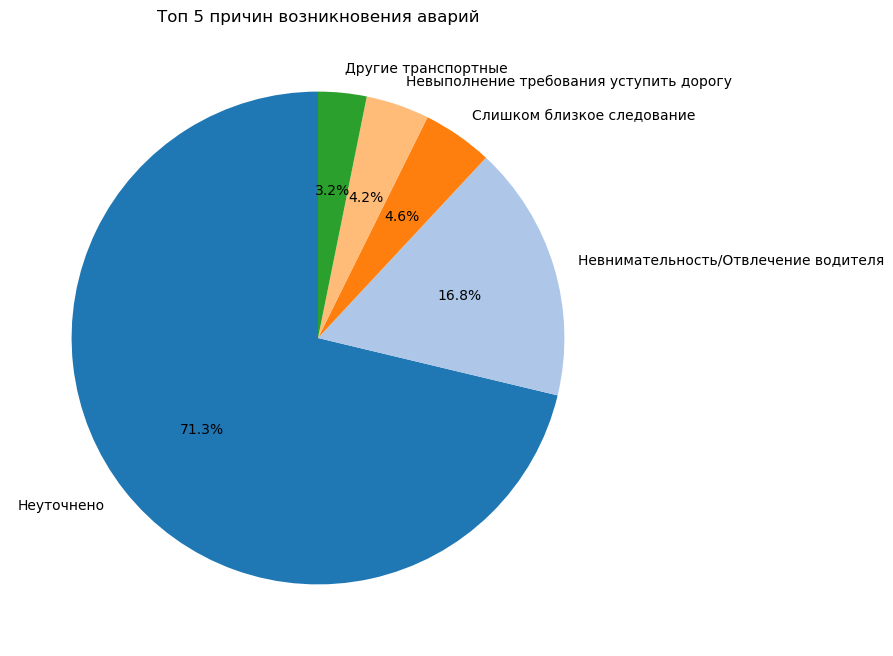

In [40]:
# Объединяем текст из столбцов, например 'Причина 1' и 'Причина 2' (замените на реальные имена, если отличаются)
all_causes = pd.concat([t21['Причина 1'], t21['Причина 2']])

# Подсчитываем частоты по каждой причине
cause_counts = all_causes.value_counts().head(5)

# Строим круговую диаграмму
plt.figure(figsize=(8,8))
cause_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Топ 5 причин возникновения аварий')
plt.ylabel('')  # скрываем подпись оси Y
plt.show()


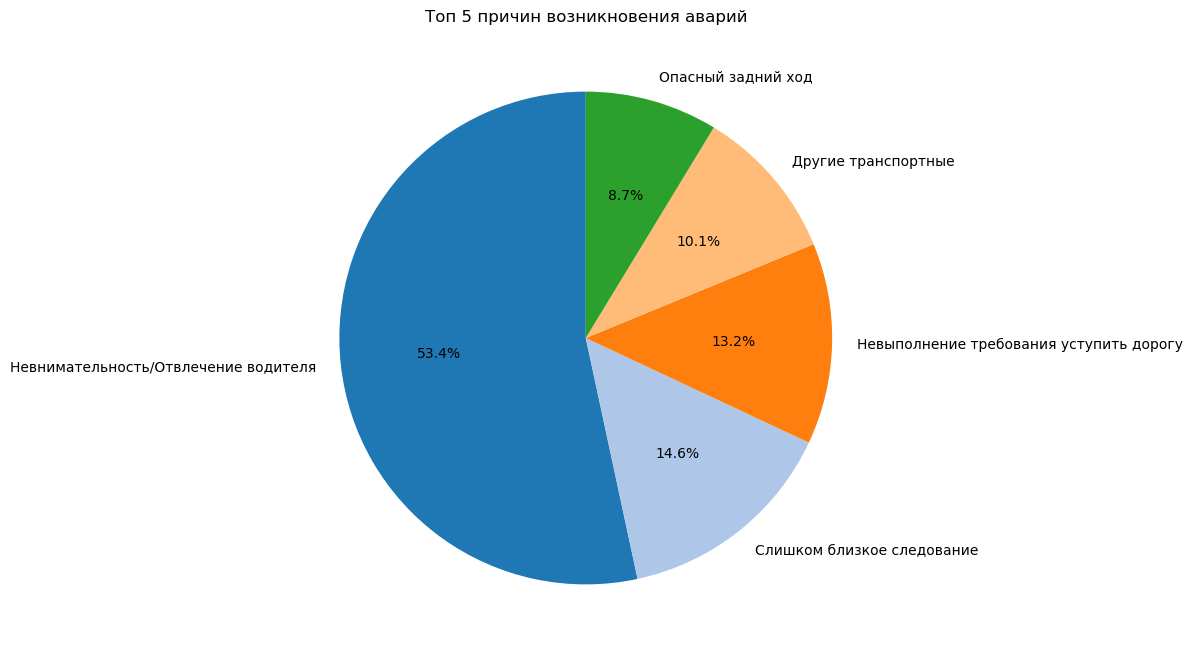

In [43]:
# Объединяем значения по столбцам, например, 'Причина 1' и 'Причина 2'
all_causes = pd.concat([t21['Причина 1'], t21['Причина 2']])

# Исключаем значения 'Unspecified'
all_causes_filtered = all_causes[all_causes != 'Неуточнено']

# Подсчитываем топ-5 самых частых причин
top5 = all_causes_filtered.value_counts().head(5)

# Строим круговую диаграмму
plt.figure(figsize=(8,8))
top5.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Топ 5 причин возникновения аварий')
plt.ylabel('')
plt.show()


### 4.3 Тип транспорта

In [67]:
# Лист значений из столбца
unique_values_list = t31['Тип транспорта 1'].unique().tolist()
print(unique_values_list)

['Sedan', 'Dump', 'Station Wagon/Sport Utility Vehicle', 'Tanker', 'Bus', 'Van', 'Motorscooter', 'Taxi', 'Ambulance', 'Box Truck', 'Garbage or Refuse', 'Motorcycle', 'E-Scooter', 'UTILITY', 'E-Bike', 'Pick-up Truck', 'Tractor Truck Diesel', 'Flat Bed', 'Bike', 'Tow Truck / Wrecker', '�MBU', 'PK', 'Moped', 'AMBULANCE', 'Trailer', 'SCHOOL BUS', 'Lift Boom', 'CATER', 'PKUP', 'Carry All', 'FDNY Ambul', '3-Door', 'Beverage Truck', 'Convertible', 'TOW TRUCK', 'UNKNOWN', 'dump', 'Flat Rack', 'UNK', 'USPCS', 'Tractor Truck Gasoline', 'GARBAGE TR', 'Motorbike', 'Minicycle', 'FIRE TRUCK', 'Armored Truck', 'USPS truck', 'COM', 'MOPED', 'SW/VAN', 'Bulk Agriculture', 'Dot', 'Concrete Mixer', 'Chassis Cab', 'Excavator', 'Fork lift', '4 dr sedan', 'STREET SWE', 'unknown', 'fire truck', 'Glass Rack', 'PSD', 'PICK UP', 'Scooter', 'Open Body', 'MTA', 'Multi-Wheeled Vehicle', 'TRAILER', 'Tow Truck', 'USPS VEHIC', 'FIRE', 'Truck', 'LIMO', 'MACK', 'Refrigerated Van', 'Stake or Rack', 'WORK VAN', 'van', 'Pi

In [41]:
# Копия среза
t31 = t31.copy()

# Перевод значений из столбца
translation_dict = {
    'Sedan': 'Седан',
    'Dump': 'Самосвал',
    'Tanker': 'Танкер',
    'Bus': 'Автобус',
    'Van': 'Фургон',
    'Motorscooter': 'Мотороллер',
    'Taxi': 'Такси',
    'Ambulance': 'Скорая помощь',
    'Box Truck': 'Грузовик с контейнером',
    'Garbage or Refuse': 'Мусоровоз',
    'Motorcycle': 'Мотоцикл',
    'E-Scooter': 'Электросамокат',
    'UTILITY': 'Утилитарное транспортное средство',
    'E-Bike': 'Электровелосипед',
    'Pick-up Truck': 'Пикап',
    'Tractor Truck Diesel': 'Дизельный тягач',
    'Flat Bed': 'Платформа',
    'Bike': 'Велосипед',
    'Tow Truck / Wrecker': 'Эвакуатор',
    'Moped': 'Мопед',
    'Trailer': 'Прицеп',
    'School Bus': 'Школьный автобус',
    'Lift Boom': 'Подъемный кран',
    'CATER': 'Спецтехника',
    'Carry All': 'Многоцелевое транспортное средство',
    'FDNY Ambul': 'Скорая FDNY',
    '3-Door': 'Трёхдверный',
    'Beverage Truck': 'Грузовик с напитками',
    'Convertible': 'Кабриолет',
    'Unknown': 'Неизвестно',
    'Flat Rack': 'Платформа для крупногабаритных грузов',
    'Tractor Truck Gasoline': 'Бензиновый тягач',
    'Fire Truck': 'Пожарная машина',
    'Armored Truck': 'Бронированный грузовик',
    'USPS truck': 'Грузовик почты США',
    'Bulk Agriculture': 'Сельскохозяйственный транспорт',
    'Concrete Mixer': 'Бетономешалка',
    'Excavator': 'Экскаватор',
    'Fork lift': 'Погрузчик',
    '4 dr sedan': 'Седан с 4 дверями',
    'Street Sweeper': 'Машина для подметания улиц',
    'Motor Home': 'Дом на колесах',
    'Box': 'Контейнер',
    'Pickup': 'Пикап',
    'Limo': 'Лимузин',
    'Fire Engine': 'Пожарная машина',
    'VAN': 'Фургон',
    'TAXI': 'Такси',
    'PASSENGER VEHICLE': 'Легковой автомобиль',
    'OTHER': 'Другое',
    'SPORT UTILITY / STATION WAGON': 'Спортивный универсал',
    'Station Wagon/Sport Utility Vehicle': 'Внедорожный универсал',
    # Добавьте остальные по мере необходимости
}
# Синхронизация перевода значений стобца 1 и столбца 2
def translate_reason(reason):
    return translation_dict.get(reason, reason)

t31['Тип транспорта 1'] = t31['Тип транспорта 1'].apply(translate_reason)
t31['Тип транспорта 2'] = t31['Тип транспорта 2'].apply(translate_reason)


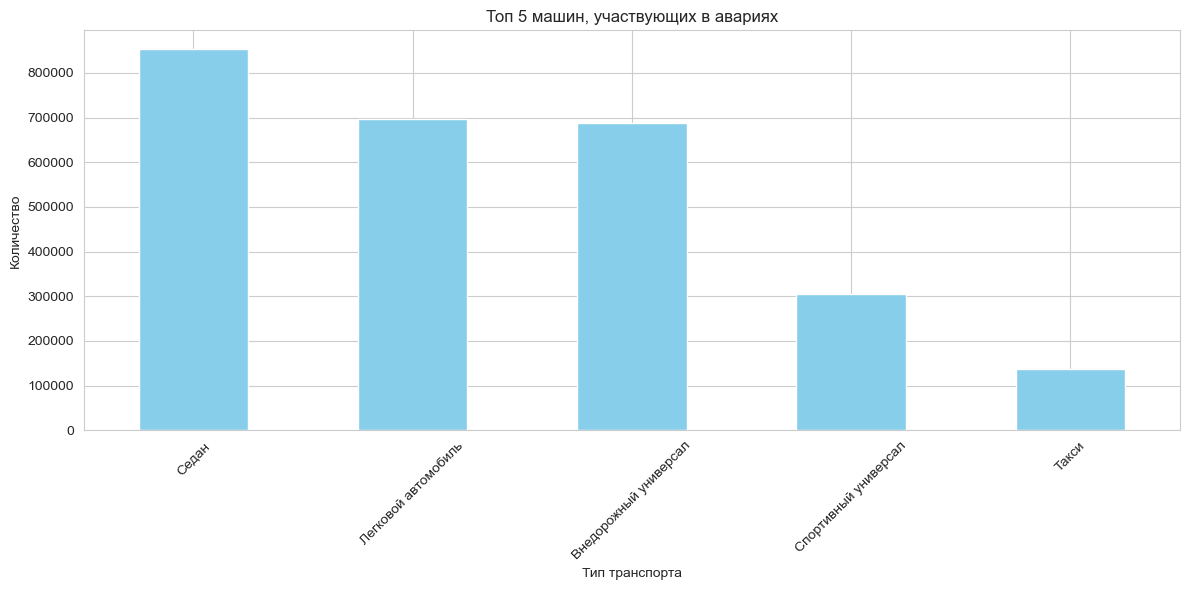

In [100]:
# Объединяем данные из двух столбцов
all_vehicles = pd.concat([t31['Тип транспорта 1'], t31['Тип транспорта 2']])

# Исключаем значение 'UNKNOWN'
filtered_vehicles = all_vehicles[all_vehicles != 'UNKNOWN']

# Подсчитываем топ-10 значений
top10 = filtered_vehicles.value_counts().head(5)

# Строим диаграмму, например, столбчатую
plt.figure(figsize=(12,6))
top10.plot.bar(color='skyblue')
plt.title('Топ 5 машин, участвующих в авариях')
plt.xlabel('Тип транспорта')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


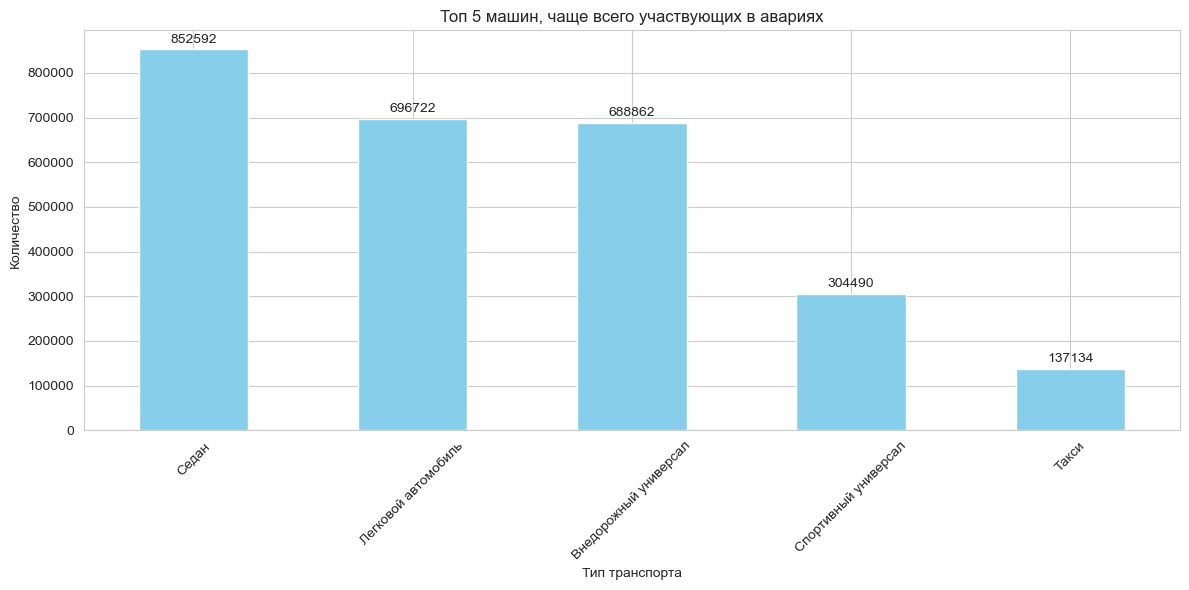

In [102]:
# Объединяем данные из двух столбцов
all_vehicles = pd.concat([t31['Тип транспорта 1'], t31['Тип транспорта 2']])

# Исключаем значение 'UNKNOWN'
filtered_vehicles = all_vehicles[all_vehicles != 'UNKNOWN']

# Подсчитываем топ-10 значений
top10 = filtered_vehicles.value_counts().head(5)

# Строим диаграмму
plt.figure(figsize=(12,6))
ax = top10.plot.bar(color='skyblue')
plt.title('Топ 5 машин, чаще всего участвующих в авариях')
plt.xlabel('Тип транспорта')
plt.ylabel('Количество')
plt.xticks(rotation=45)

# Добавляем цифровые значения над столбцами
for i, v in enumerate(top10):
    ax.text(i, v + max(top10)*0.01, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 4.4 Место происшествия

In [36]:
t41

,Местоположение,Название улицы,Название перекрёстка
4,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET
9,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET
11,"(40.675884, -73.75577)",SPRINGFIELD BOULEVARD,EAST GATE PLAZA
14,"(40.66684, -73.78941)",NORTH CONDUIT AVENUE,150 STREET
18,"(40.87262, -73.904686)",WEST KINGSBRIDGE ROAD,HEATH AVENUE
...,...,...,...
2109635,"(40.812263, -73.92059)",WILLIS AVENUE,EAST 143 STREET
2109667,"(40.675735, -73.89686)",ATLANTIC AVENUE,PENNSYLVANIA AVENUE
2109755,"(40.804153, -73.91304)",BRUCKNER BOULEVARD,EAST 137 STREET
2109765,"(40.68476, -73.75663)",LUCAS STREET,122 AVENUE


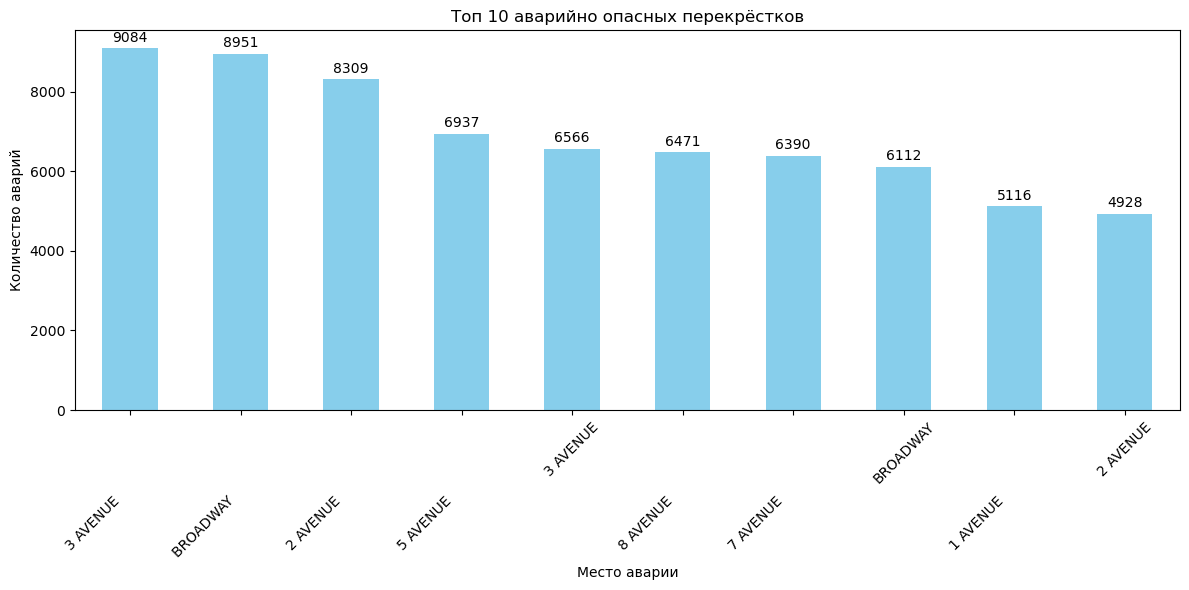

In [37]:
location_counts = t41['Название перекрёстка'].value_counts()
top10_locations = location_counts.head(10)

mapped_index = top10_locations.index.to_series().map(translation_dict)
mapped_index = mapped_index.where(mapped_index.notna(), top10_locations.index)

top10_locations.index = mapped_index

plt.figure(figsize=(12,6))
ax = top10_locations.plot.bar(color='skyblue')
plt.title('Топ 10 аварийно опасных перекрёстков')
plt.xlabel('Место аварии')
plt.ylabel('Количество аварий')
plt.xticks(rotation=45)

for i, v in enumerate(top10_locations):
    ax.text(i, v + max(top10_locations)*0.01, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


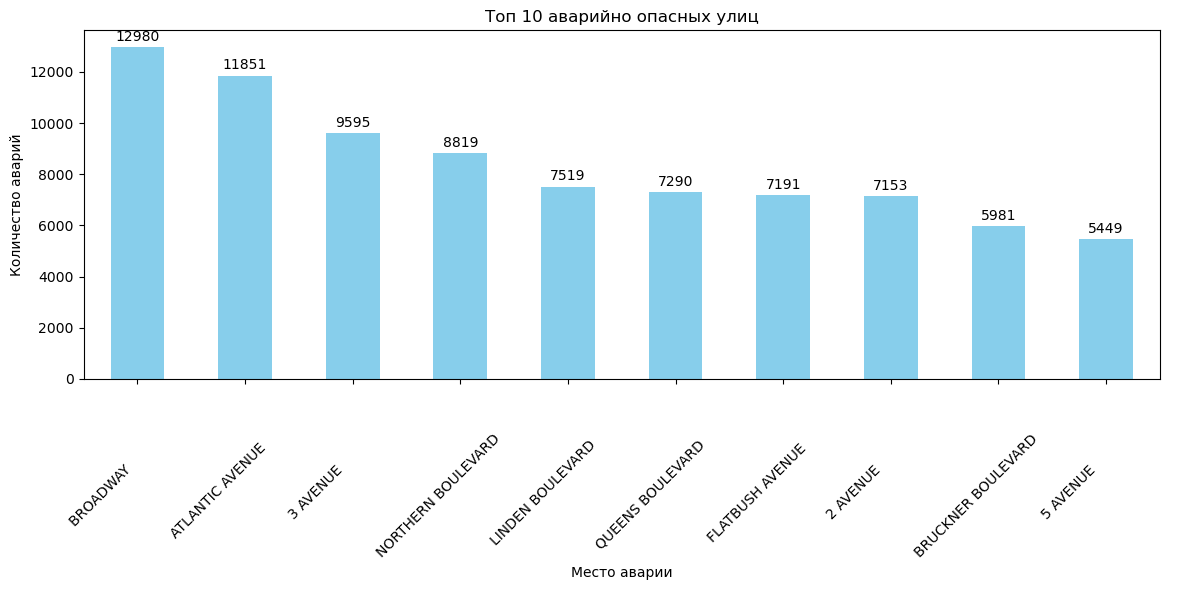

In [38]:
location_counts = t41['Название улицы'].value_counts()
top10_locations = location_counts.head(10)

mapped_index = top10_locations.index.to_series().map(translation_dict)
mapped_index = mapped_index.where(mapped_index.notna(), top10_locations.index)

top10_locations.index = mapped_index

plt.figure(figsize=(12,6))
ax = top10_locations.plot.bar(color='skyblue')
plt.title('Топ 10 аварийно опасных улиц')
plt.xlabel('Место аварии')
plt.ylabel('Количество аварий')
plt.xticks(rotation=45)

for i, v in enumerate(top10_locations):
    ax.text(i, v + max(top10_locations)*0.01, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


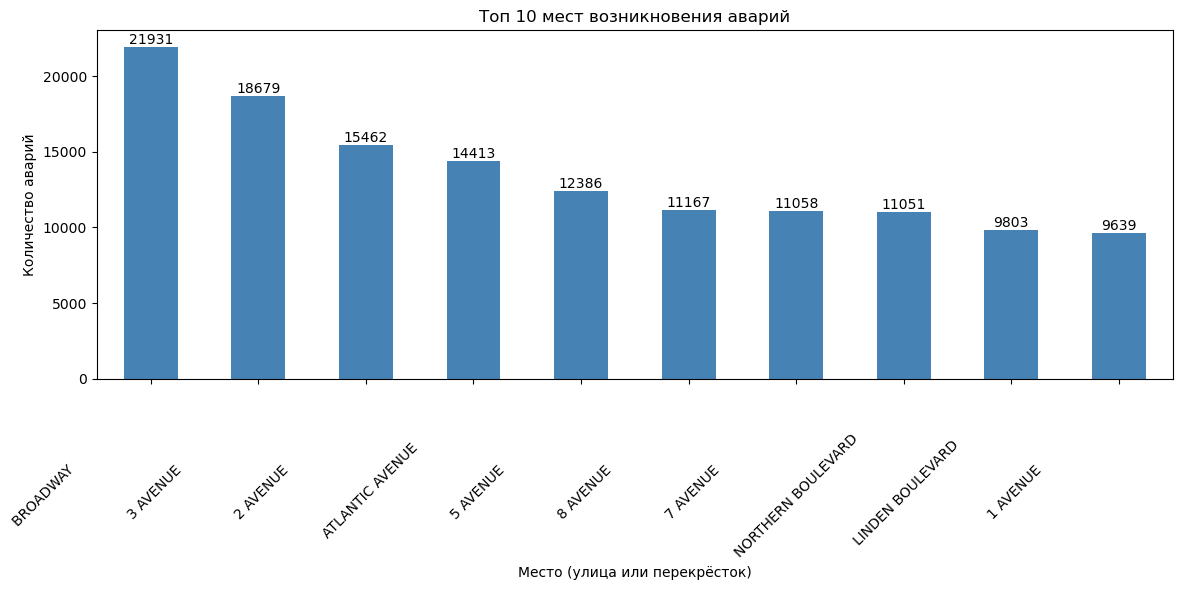

In [40]:
# Объединяем два столбца в один для подсчёта всех мест
all_places = pd.concat([t41['Название улицы'], t41['Название перекрёстка']])

# Подсчитываем количество каждого места
place_counts = all_places.value_counts().head(10)

# Построение столбчатой диаграммы
plt.figure(figsize=(12,6))
ax = place_counts.plot.bar(color='steelblue')
plt.title('Топ 10 мест возникновения аварий')
plt.xlabel('Место (улица или перекрёсток)')
plt.ylabel('Количество аварий')
plt.xticks(rotation=45, ha='right')

# Добавляем подписи с количеством аварий над столбцами
for i, v in enumerate(place_counts):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 4.5 Количество погибших и пострадавших

In [41]:
t51

,Дата аварии,Количество пострадавших,Количество погибших,Пешеходы пострадавшие,Пешеходы погибшие,Велосипедисты пострадавшие,Велосипедисты погибшие,Водители пострадавшие,Водители погибшие
0,09/11/2021,2.0,0.0,0,0,0,0,2,0
1,03/26/2022,1.0,0.0,0,0,0,0,1,0
2,06/29/2022,0.0,0.0,0,0,0,0,0,0
3,09/11/2021,0.0,0.0,0,0,0,0,0,0
4,12/14/2021,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2109797,08/06/2024,0.0,0.0,0,0,0,0,0,0
2109798,08/03/2024,0.0,0.0,0,0,0,0,0,0
2109799,07/29/2024,0.0,0.0,0,0,0,0,0,0
2109800,08/02/2024,0.0,0.0,0,0,0,0,0,0


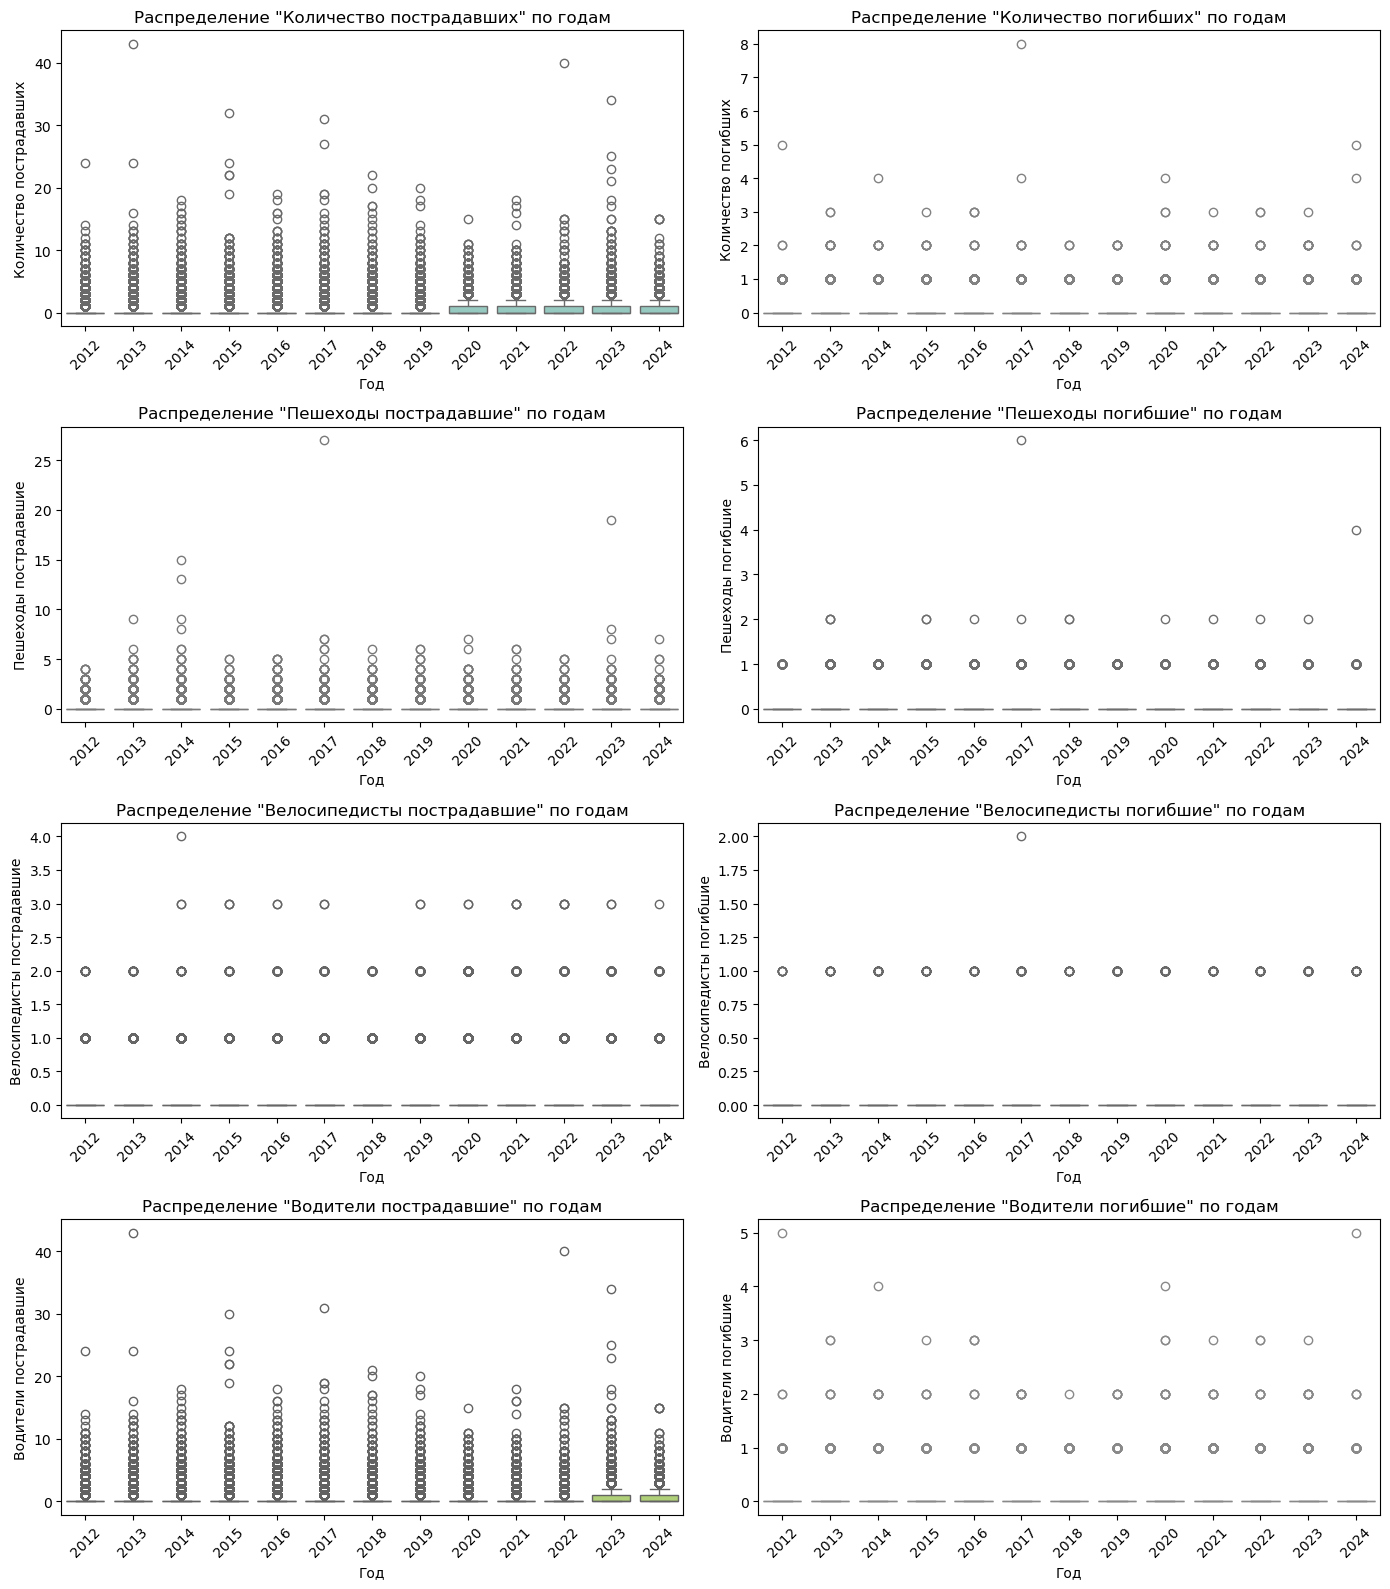

In [42]:
# Копия среза
t51 = t51.copy()

# Убедимся, что 'Дата аварии' имеет тип datetime
t51['Дата аварии'] = pd.to_datetime(t51['Дата аварии'])

# Извлекаем год
t51['Год'] = t51['Дата аварии'].dt.year

# Список нужных столбцов для визуализации
columns_to_plot = [
    'Количество пострадавших', 'Количество погибших',
    'Пешеходы пострадавшие', 'Пешеходы погибшие',
    'Велосипедисты пострадавшие', 'Велосипедисты погибшие',
    'Водители пострадавшие', 'Водители погибшие'
]

# Фильтруем только не-нулевые или не-NaN значения (по желанию)
# Можно оставить все — NaN будут проигнорированы при построении

# Настройка графиков: 4 строки по 2 графика (всего 8)
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()  # Превращаем 2D массив осей в 1D для удобства

# Цвета можно задать одинаковые или разные
colors = sns.color_palette("Set3", len(columns_to_plot))

for i, col in enumerate(columns_to_plot):
    if col in t51.columns:
        sns.boxplot(data=t51, x='Год', y=col, ax=axes[i], color=colors[i])
        axes[i].set_title(f'Распределение "{col}" по годам')
        axes[i].tick_params(axis='x', rotation=45)

# Убираем пустые подграфики, если их больше
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

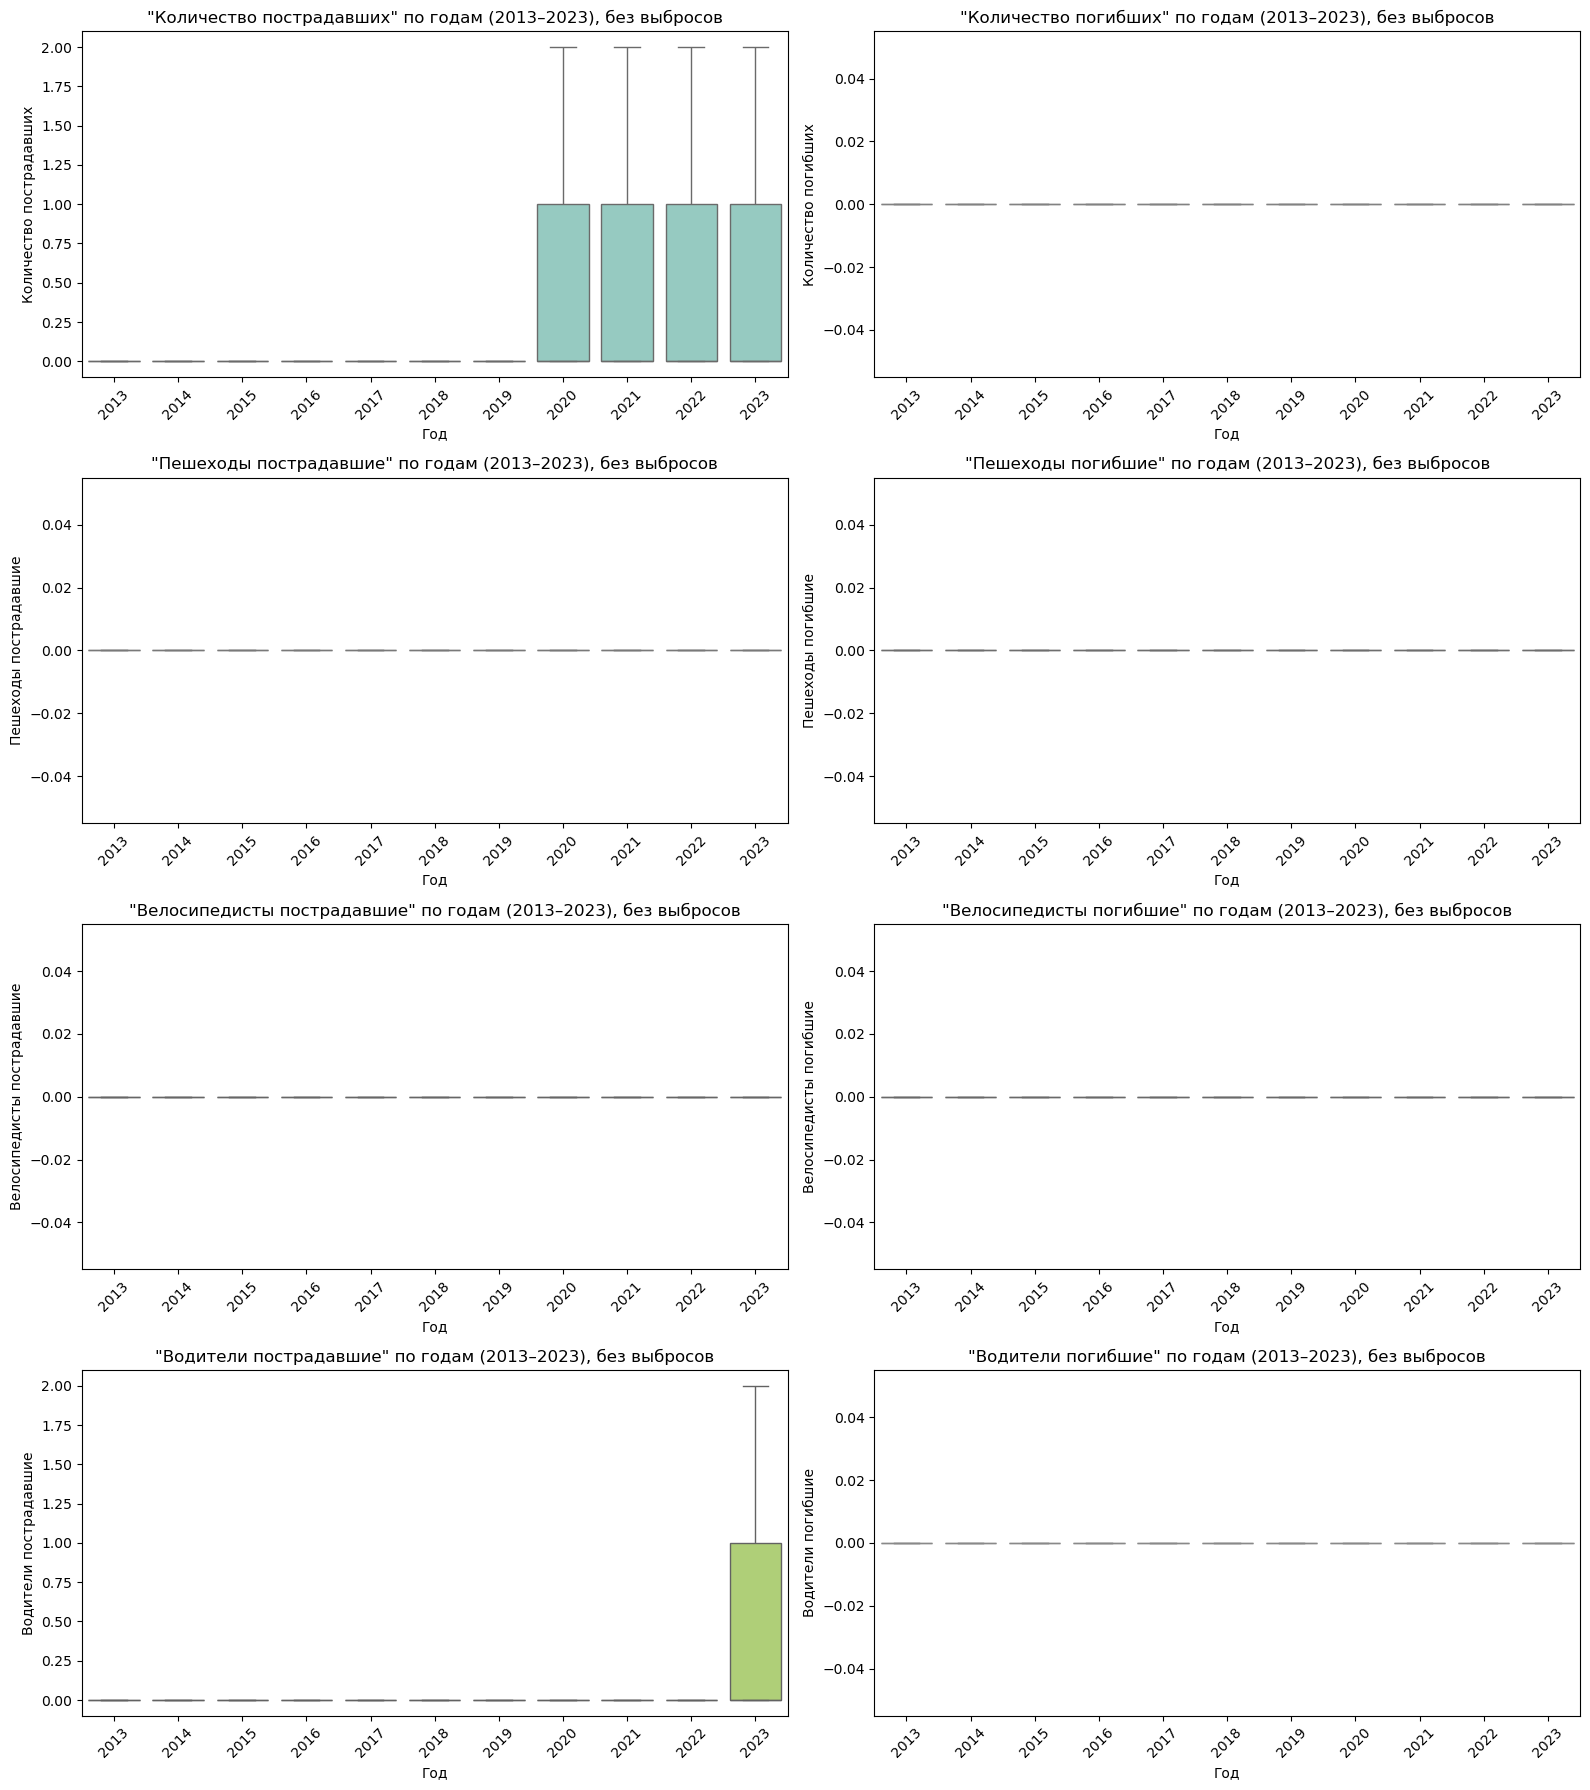

In [43]:
# Убедимся, что 'Дата аварии' имеет тип datetime
df2['Дата аварии'] = pd.to_datetime(df2['Дата аварии'])

# Извлекаем год
df2['Год'] = df2['Дата аварии'].dt.year

# Фильтруем данные по годам: с 2013 по 2023
df_filtered = df2[(df2['Год'] >= 2013) & (df2['Год'] <= 2023)]

# Список нужных столбцов для визуализации
columns_to_plot = [
    'Количество пострадавших', 'Количество погибших',
    'Пешеходы пострадавшие', 'Пешеходы погибшие',
    'Велосипедисты пострадавшие', 'Велосипедисты погибшие',
    'Водители пострадавшие', 'Водители погибшие'
]

# Настройка графиков: 4 строки по 2 графика (всего 8)
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()

# Цвета
colors = sns.color_palette("Set3", len(columns_to_plot))

for i, col in enumerate(columns_to_plot):
    if col in df_filtered.columns:
        # Построение boxplot без выбросов (showfliers=False)
        sns.boxplot(data=df_filtered, x='Год', y=col, ax=axes[i], 
                    color=colors[i], showfliers=False)
        axes[i].set_title(f'"{col}" по годам (2013–2023), без выбросов')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        fig.delaxes(axes[i])  # Если столбец не найден — удаляем график

# Удаление оставшихся пустых подграфиков
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 4.6 Анализ данных по годам

In [97]:
t61

,Дата аварии,Количество пострадавших,Количество погибших
0,09/11/2021,2.0,0.0
1,03/26/2022,1.0,0.0
2,06/29/2022,0.0,0.0
3,09/11/2021,0.0,0.0
4,12/14/2021,0.0,0.0
...,...,...,...
2109797,08/06/2024,0.0,0.0
2109798,08/03/2024,0.0,0.0
2109799,07/29/2024,0.0,0.0
2109800,08/02/2024,0.0,0.0


In [99]:
# Корректный способ создать новый столбец, избегая SettingWithCopyWarning:
t61 = t61.copy()  # если t61 был получен срезом, делаем явную копию
t61.loc[:, 'Год'] = pd.to_datetime(t61['Дата аварии']).dt.year


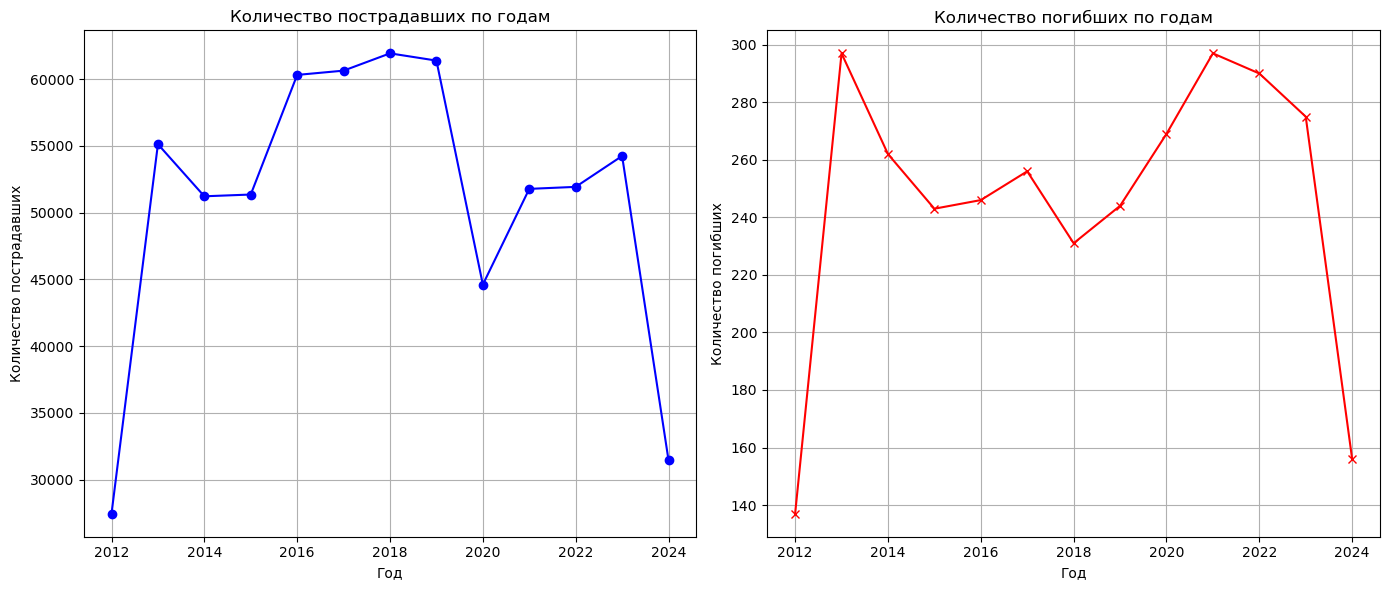

In [102]:
# Преобразуем 'Дата аварии' в datetime и создаём столбец с годом
t61 = t61.copy()
t61.loc[:, 'Год'] = pd.to_datetime(t61['Дата аварии']).dt.year

# Группируем данные по году и считаем суммы
grouped = t61.groupby('Год')[['Количество пострадавших', 'Количество погибших']].sum()

# Строим два графика рядом с помощью subplot
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharex=True)

# График количества пострадавших
axes[0].plot(grouped.index, grouped['Количество пострадавших'], marker='o', color='blue')
axes[0].set_title('Количество пострадавших по годам')
axes[0].set_xlabel('Год')
axes[0].set_ylabel('Количество пострадавших')
axes[0].grid(True)

# График количества погибших
axes[1].plot(grouped.index, grouped['Количество погибших'], marker='x', color='red')
axes[1].set_title('Количество погибших по годам')
axes[1].set_xlabel('Год')
axes[1].set_ylabel('Количество погибших')
axes[1].grid(True)

plt.tight_layout()
plt.show()


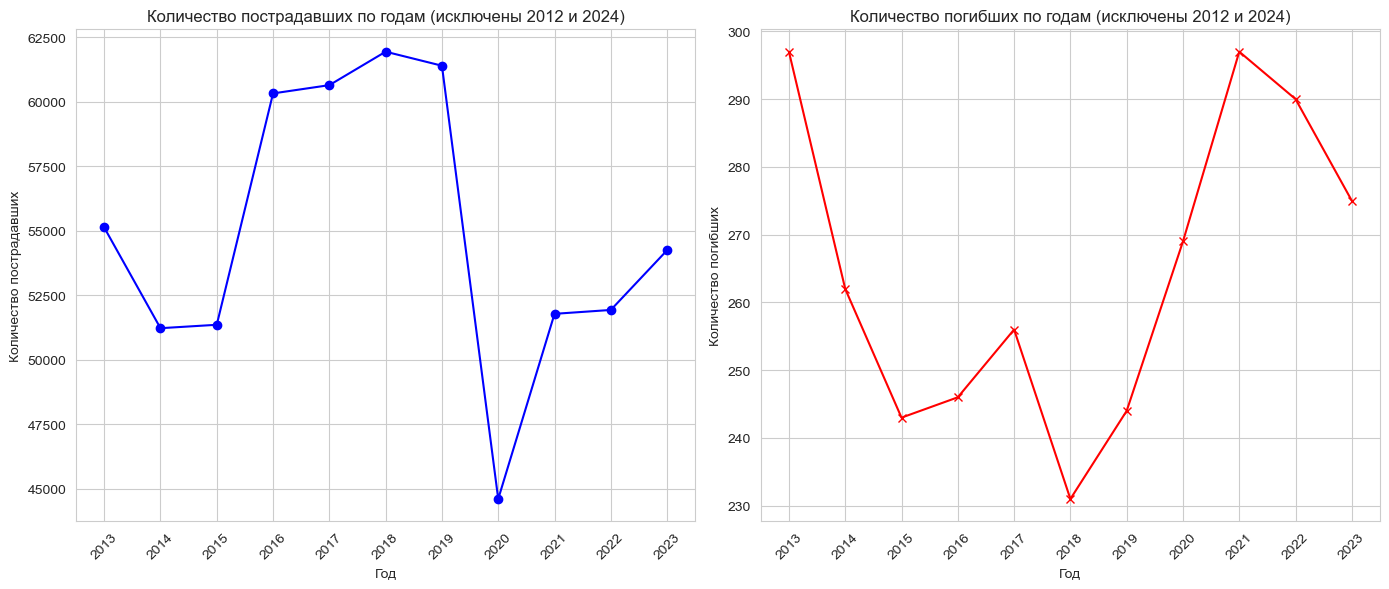

Статистика по годам (исключены 2012 и 2024):
      Количество пострадавших  Количество погибших
Год                                               
2013                  55128.0                297.0
2014                  51226.0                262.0
2015                  51358.0                243.0
2016                  60317.0                246.0
2017                  60637.0                256.0
2018                  61932.0                231.0
2019                  61389.0                244.0
2020                  44614.0                269.0
2021                  51782.0                297.0
2022                  51932.0                290.0
2023                  54245.0                275.0


In [105]:
# Преобразуем 'Дата аварии' в datetime и создаём столбец с годом
t61 = t61.copy()
t61.loc[:, 'Год'] = pd.to_datetime(t61['Дата аварии']).dt.year

# Исключаем данные за 2012 и 2024 годы
t61_filtered = t61[~t61['Год'].isin([2012, 2024])].copy()

# Группируем отфильтрованные данные по году и считаем суммы
grouped = t61_filtered.groupby('Год')[['Количество пострадавших', 'Количество погибших']].sum()

# Строим два графика рядом с помощью subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# График количества пострадавших
axes[0].plot(grouped.index, grouped['Количество пострадавших'], marker='o', color='blue')
axes[0].set_title('Количество пострадавших по годам (исключены 2012 и 2024)')
axes[0].set_xlabel('Год')
axes[0].set_ylabel('Количество пострадавших')
axes[0].grid(True)

# График количества погибших
axes[1].plot(grouped.index, grouped['Количество погибших'], marker='x', color='red')
axes[1].set_title('Количество погибших по годам (исключены 2012 и 2024)')
axes[1].set_xlabel('Год')
axes[1].set_ylabel('Количество погибших')
axes[1].grid(True)

# Настраиваем отображение годов на оси X
years = sorted(grouped.index.unique())
axes[0].set_xticks(years)
axes[0].set_xticklabels(years, rotation=45)
axes[1].set_xticks(years)
axes[1].set_xticklabels(years, rotation=45)

plt.tight_layout()
plt.show()

# Дополнительно выводим статистику по годам
print("Статистика по годам (исключены 2012 и 2024):")
print(grouped)


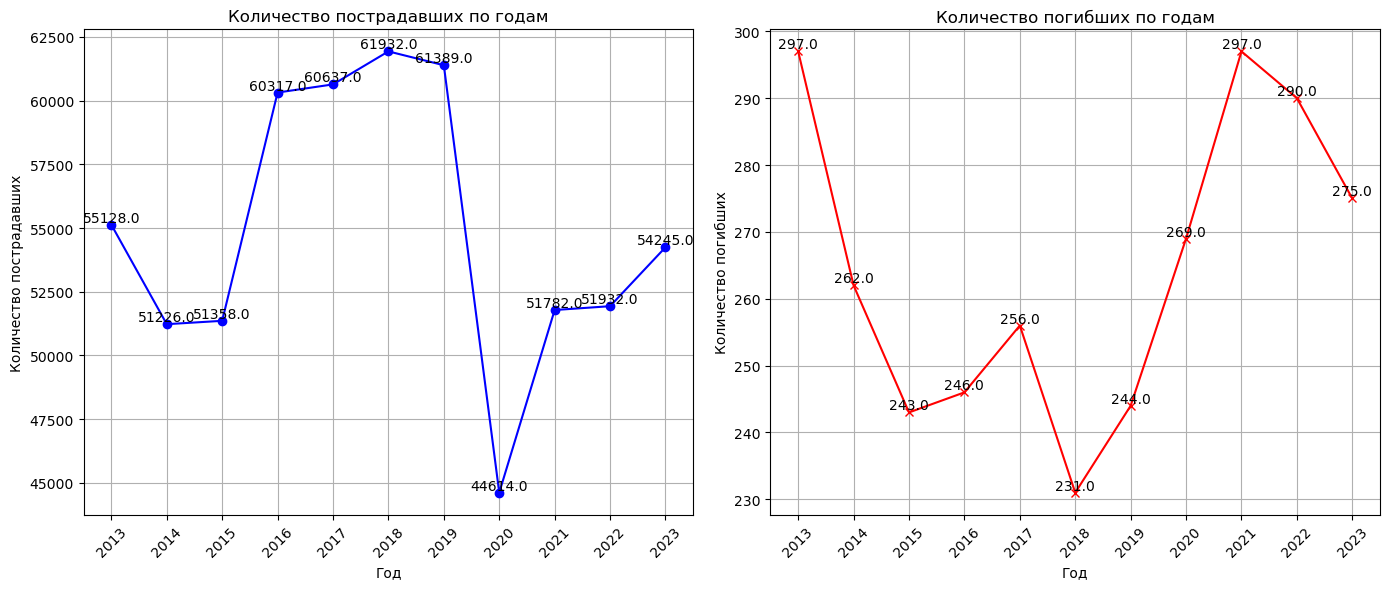

Статистика по годам:
      Количество пострадавших  Количество погибших
Год                                               
2013                  55128.0                297.0
2014                  51226.0                262.0
2015                  51358.0                243.0
2016                  60317.0                246.0
2017                  60637.0                256.0
2018                  61932.0                231.0
2019                  61389.0                244.0
2020                  44614.0                269.0
2021                  51782.0                297.0
2022                  51932.0                290.0
2023                  54245.0                275.0


In [42]:
# Преобразуем 'Дата аварии' в datetime и создаём столбец с годом
t61 = t61.copy()
t61.loc[:, 'Год'] = pd.to_datetime(t61['Дата аварии']).dt.year

# Исключаем данные за 2012 и 2024 годы
t61_filtered = t61[~t61['Год'].isin([2012, 2024])].copy()

# Группируем отфильтрованные данные по году и считаем суммы
grouped = t61_filtered.groupby('Год')[['Количество пострадавших', 'Количество погибших']].sum()

# Строим два графика рядом с помощью subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# График количества пострадавших
axes[0].plot(grouped.index, grouped['Количество пострадавших'], marker='o', color='blue')
axes[0].set_title('Количество пострадавших по годам')
axes[0].set_xlabel('Год')
axes[0].set_ylabel('Количество пострадавших')
axes[0].grid(True)

# Добавляем подписи на график пострадавших
for x, y in zip(grouped.index, grouped['Количество пострадавших']):
    axes[0].text(x, y, str(y), ha='center', va='bottom')

# График количества погибших
axes[1].plot(grouped.index, grouped['Количество погибших'], marker='x', color='red')
axes[1].set_title('Количество погибших по годам')
axes[1].set_xlabel('Год')
axes[1].set_ylabel('Количество погибших')
axes[1].grid(True)

# Добавляем подписи на график погибших
for x, y in zip(grouped.index, grouped['Количество погибших']):
    axes[1].text(x, y, str(y), ha='center', va='bottom')

# Настраиваем отображение годов на оси X
years = sorted(grouped.index.unique())
axes[0].set_xticks(years)
axes[0].set_xticklabels(years, rotation=45)
axes[1].set_xticks(years)
axes[1].set_xticklabels(years, rotation=45)

plt.tight_layout()
plt.show()

# Дополнительно выводим статистику по годам
print("Статистика по годам:")
print(grouped)


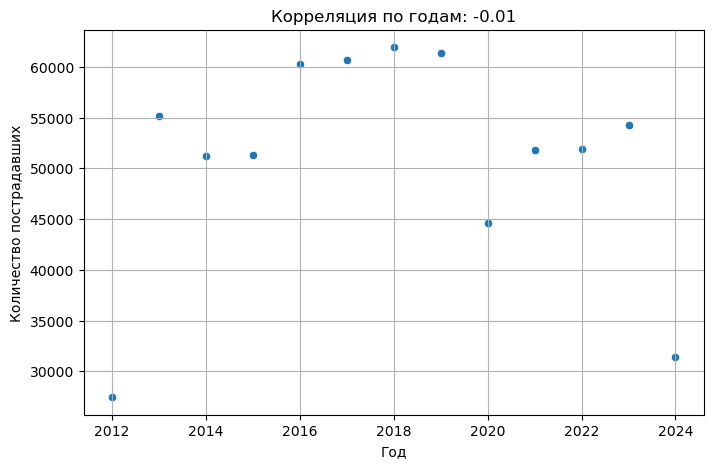

In [45]:
# Преобразуем дату в datetime и выделим год
t61['Дата аварии'] = pd.to_datetime(t61['Дата аварии'], errors='coerce')
t61['Год'] = t61['Дата аварии'].dt.year

# Группируем по годам, считаем сумму пострадавших
yearly_data = t61.groupby('Год')['Количество пострадавших'].sum().reset_index()

# Рассчитываем корреляцию года (числа) с количеством пострадавших
corr = yearly_data['Год'].corr(yearly_data['Количество пострадавших'])

# Строим график
plt.figure(figsize=(8,5))
sns.scatterplot(x='Год', y='Количество пострадавших', data=yearly_data)
plt.title(f'Корреляция по годам: {corr:.2f}')
plt.xlabel('Год')
plt.ylabel('Количество пострадавших')
plt.grid(True)
plt.show()

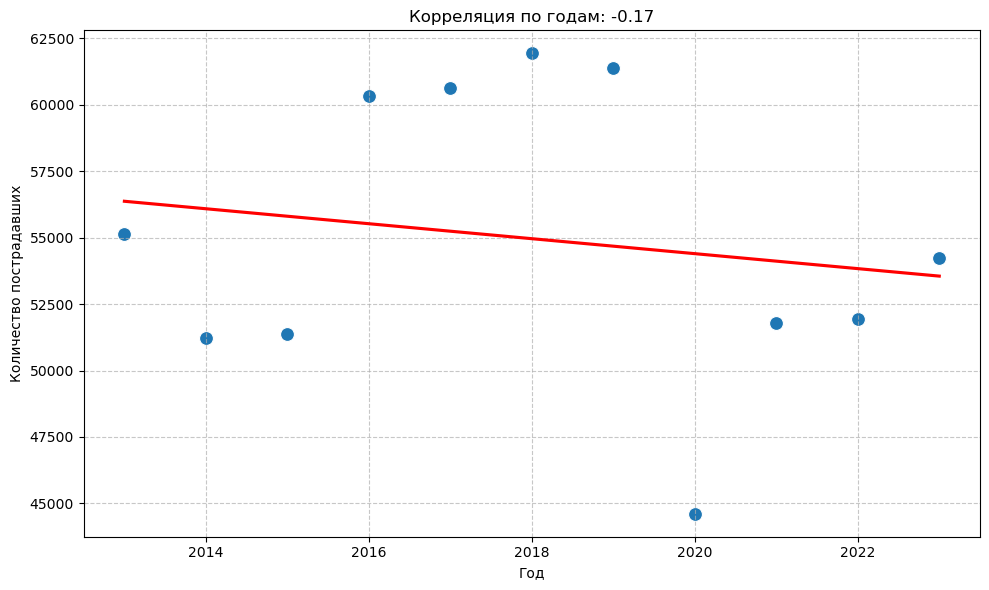

Статистика по годам:
               Год  Количество пострадавших
count    11.000000                11.000000
mean   2018.000000             54960.000000
std       3.316625              5519.342316
min    2013.000000             44614.000000
25%    2015.500000             51570.000000
50%    2018.000000             54245.000000
75%    2020.500000             60477.000000
max    2023.000000             61932.000000


In [46]:
# Преобразуем дату в datetime и выделим год
t61['Дата аварии'] = pd.to_datetime(t61['Дата аварии'], errors='coerce')
t61['Год'] = t61['Дата аварии'].dt.year

# Исключаем данные за 2012 и 2024 годы
filtered_data = t61[~t61['Год'].isin([2012, 2024])].copy()

# Группируем по годам, считаем сумму пострадавших (только для отфильтрованных данных)
yearly_data = filtered_data.groupby('Год')['Количество пострадавших'].sum().reset_index()

# Проверяем, остались ли данные после фильтрации
if not yearly_data.empty:
    # Рассчитываем корреляцию года (числа) с количеством пострадавших
    corr = yearly_data['Год'].corr(yearly_data['Количество пострадавших'])
    
    # Строим график
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Год', y='Количество пострадавших', data=yearly_data, s=100)
    plt.title(f'Корреляция по годам: {corr:.2f}')
    plt.xlabel('Год')
    plt.ylabel('Количество пострадавших')
    
    # Добавляем линию тренда
    sns.regplot(x='Год', y='Количество пострадавших', data=yearly_data, 
                scatter=False, color='red', ci=None)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Выводим статистическую информацию
    print("Статистика по годам:")
    print(yearly_data.describe())
else:
    print("Нет данных для отображения после фильтрации.")

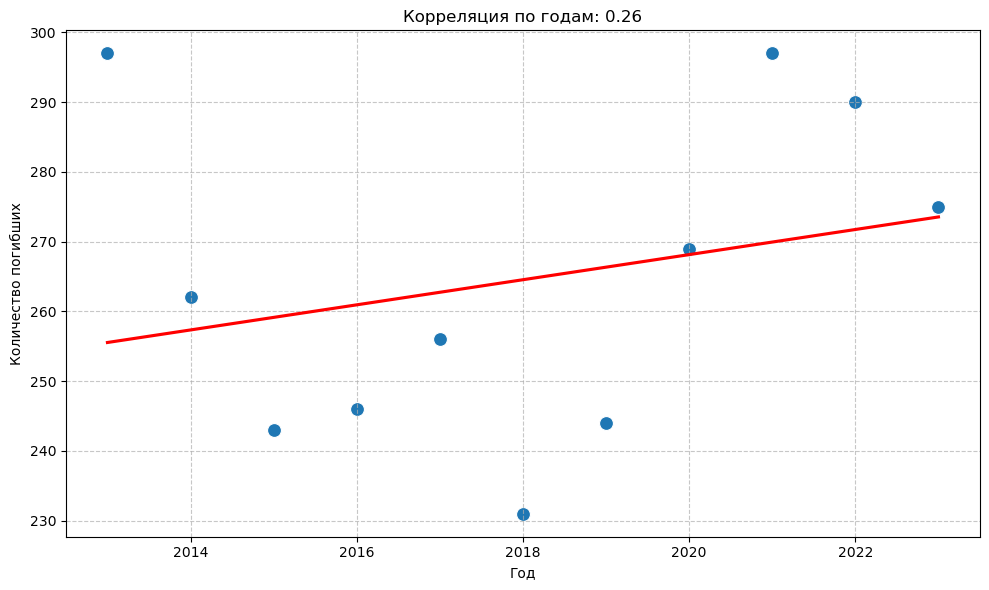

Статистика по годам:
               Год  Количество погибших
count    11.000000            11.000000
mean   2018.000000           264.545455
std       3.316625            23.062366
min    2013.000000           231.000000
25%    2015.500000           245.000000
50%    2018.000000           262.000000
75%    2020.500000           282.500000
max    2023.000000           297.000000


In [47]:
# Преобразуем дату в datetime и выделим год
t61['Дата аварии'] = pd.to_datetime(t61['Дата аварии'], errors='coerce')
t61['Год'] = t61['Дата аварии'].dt.year

# Исключаем данные за 2012 и 2024 годы
filtered_data = t61[~t61['Год'].isin([2012, 2024])].copy()

# Группируем по годам, считаем сумму пострадавших (только для отфильтрованных данных)
yearly_data = filtered_data.groupby('Год')['Количество погибших'].sum().reset_index()

# Проверяем, остались ли данные после фильтрации
if not yearly_data.empty:
    # Рассчитываем корреляцию года (числа) с количеством пострадавших
    corr = yearly_data['Год'].corr(yearly_data['Количество погибших'])
    
    # Строим график
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Год', y='Количество погибших', data=yearly_data, s=100)
    plt.title(f'Корреляция по годам: {corr:.2f}')
    plt.xlabel('Год')
    plt.ylabel('Количество погибших')
    
    # Добавляем линию тренда
    sns.regplot(x='Год', y='Количество погибших', data=yearly_data, 
                scatter=False, color='red', ci=None)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Выводим статистическую информацию
    print("Статистика по годам:")
    print(yearly_data.describe())
else:
    print("Нет данных для отображения после фильтрации.")

In [50]:
# t61 — копия
t61 = t61.copy()

# Преобразуем дату в datetime и выделим год
t61['Дата аварии'] = pd.to_datetime(t61['Дата аварии'], errors='coerce')
t61['Год'] = t61['Дата аварии'].dt.year

# Исключаем данные за 2012 и 2024 годы
filtered_data = t61[~t61['Год'].isin([2012, 2024])].copy()

# Группируем по годам, считаем сумму пострадавших (только для отфильтрованных данных)
yearly_data = filtered_data.groupby('Год')['Количество пострадавших'].sum().reset_index()

# Проверяем, есть ли данные для расчета корреляции
if len(yearly_data) >= 2:  # для корреляции нужно как минимум 2 точки
    # Рассчитываем корреляцию года (числа) с количеством пострадавших
    corr = yearly_data['Год'].corr(yearly_data['Количество пострадавших'])
    
    print(f'Коэффициент корреляции: {corr:.3f}')
    print(f"Период анализа: {int(yearly_data['Год'].min())}-{int(yearly_data['Год'].max())}")
    
    # Дополнительная информация
    print("\nСтатистика по годам:")
    print(yearly_data.describe())
else:
    print("Недостаточно данных для расчета корреляции после исключения 2012 и 2024 годов.")

Коэффициент корреляции: -0.169
Период анализа: 2013-2023

Статистика по годам:
               Год  Количество пострадавших
count    11.000000                11.000000
mean   2018.000000             54960.000000
std       3.316625              5519.342316
min    2013.000000             44614.000000
25%    2015.500000             51570.000000
50%    2018.000000             54245.000000
75%    2020.500000             60477.000000
max    2023.000000             61932.000000


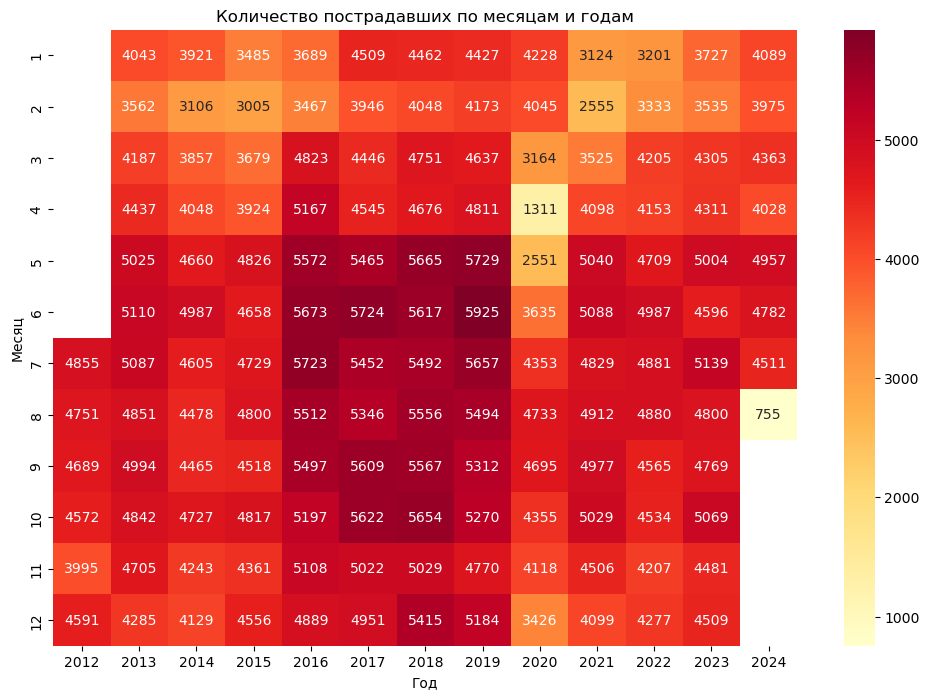

In [51]:
# t61 — копия
t61 = t61.copy()

# Преобразуем дату в datetime и выделим год и месяц
t61['Дата аварии'] = pd.to_datetime(t61['Дата аварии'], errors='coerce')
t61['Год'] = t61['Дата аварии'].dt.year
t61['Месяц'] = t61['Дата аварии'].dt.month

# Группируем по годам и месяцам, считаем сумму пострадавших
grouped = t61.groupby(['Год', 'Месяц'])['Количество пострадавших'].sum().reset_index()

# Создаем сводную таблицу для удобства визуализации
pivot_table = grouped.pivot(index='Месяц', columns='Год', values='Количество пострадавших')

# Строим тепловую карту для визуализации динамики по годам и месяцам
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlOrRd')
plt.title('Количество пострадавших по месяцам и годам')
plt.xlabel('Год')
plt.ylabel('Месяц')
plt.show()


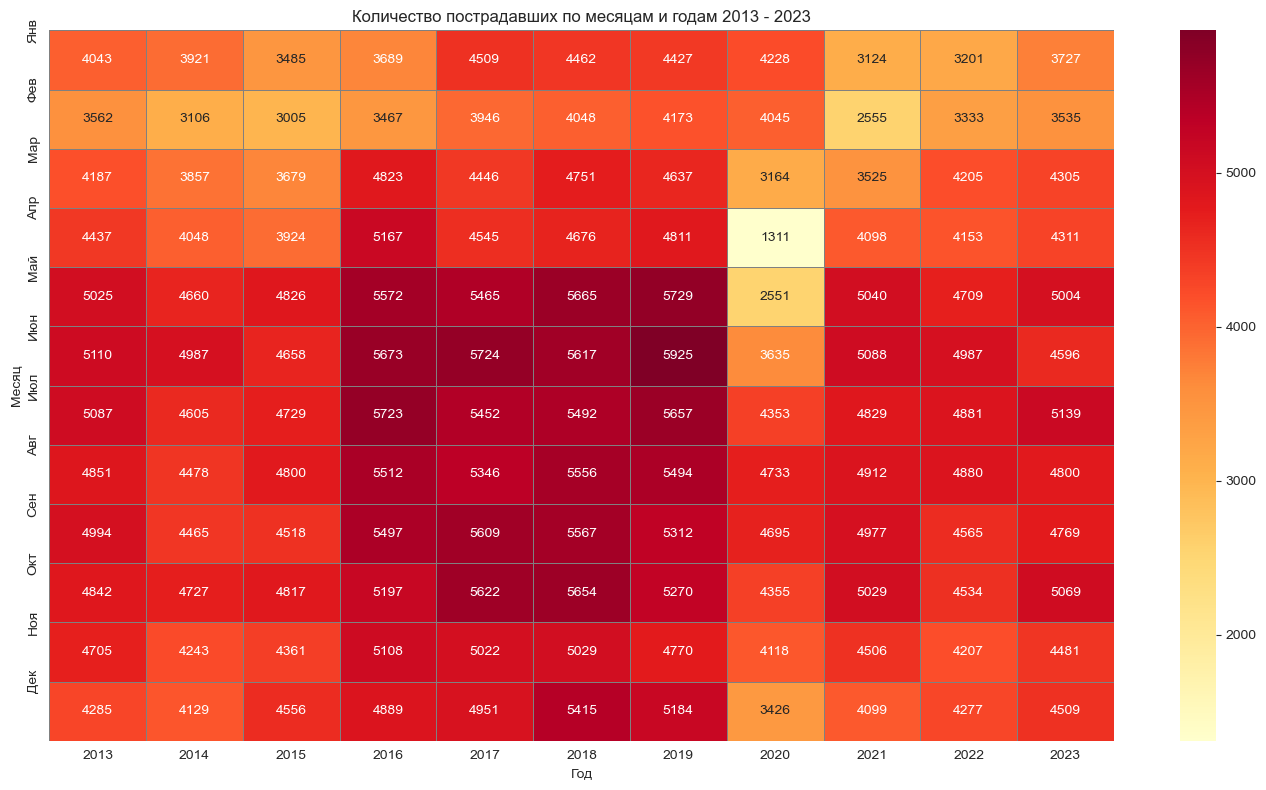

Анализ проведен за период с 2013 по 2023 годы
Исключены данные за 2012 и 2024 годы


In [112]:
# Преобразуем дату в datetime и выделим год и месяц
t61['Дата аварии'] = pd.to_datetime(t61['Дата аварии'], errors='coerce')
t61['Год'] = t61['Дата аварии'].dt.year
t61['Месяц'] = t61['Дата аварии'].dt.month

# Исключаем данные за 2012 и 2024 годы
filtered_data = t61[~t61['Год'].isin([2012, 2024])].copy()

# Группируем по годам и месяцам, считаем сумму пострадавших (только для отфильтрованных данных)
grouped = filtered_data.groupby(['Год', 'Месяц'])['Количество пострадавших'].sum().reset_index()

# Создаем сводную таблицу для удобства визуализации
pivot_table = grouped.pivot(index='Месяц', columns='Год', values='Количество пострадавших')

# Сортируем столбцы (годы) в порядке возрастания
pivot_table = pivot_table.sort_index(axis=1)

# Строим тепловую карту для визуализации динамики по годам и месяцам
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title('Количество пострадавших по месяцам и годам 2013 - 2023')
plt.xlabel('Год')
plt.ylabel('Месяц')

# Добавляем подписи месяцев
month_labels = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 
                'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
plt.yticks(ticks=range(12), labels=month_labels)

plt.tight_layout()
plt.show()

# Дополнительная информация
print("Анализ проведен за период с", int(pivot_table.columns.min()), "по", int(pivot_table.columns.max()), "годы")
print("Исключены данные за 2012 и 2024 годы")

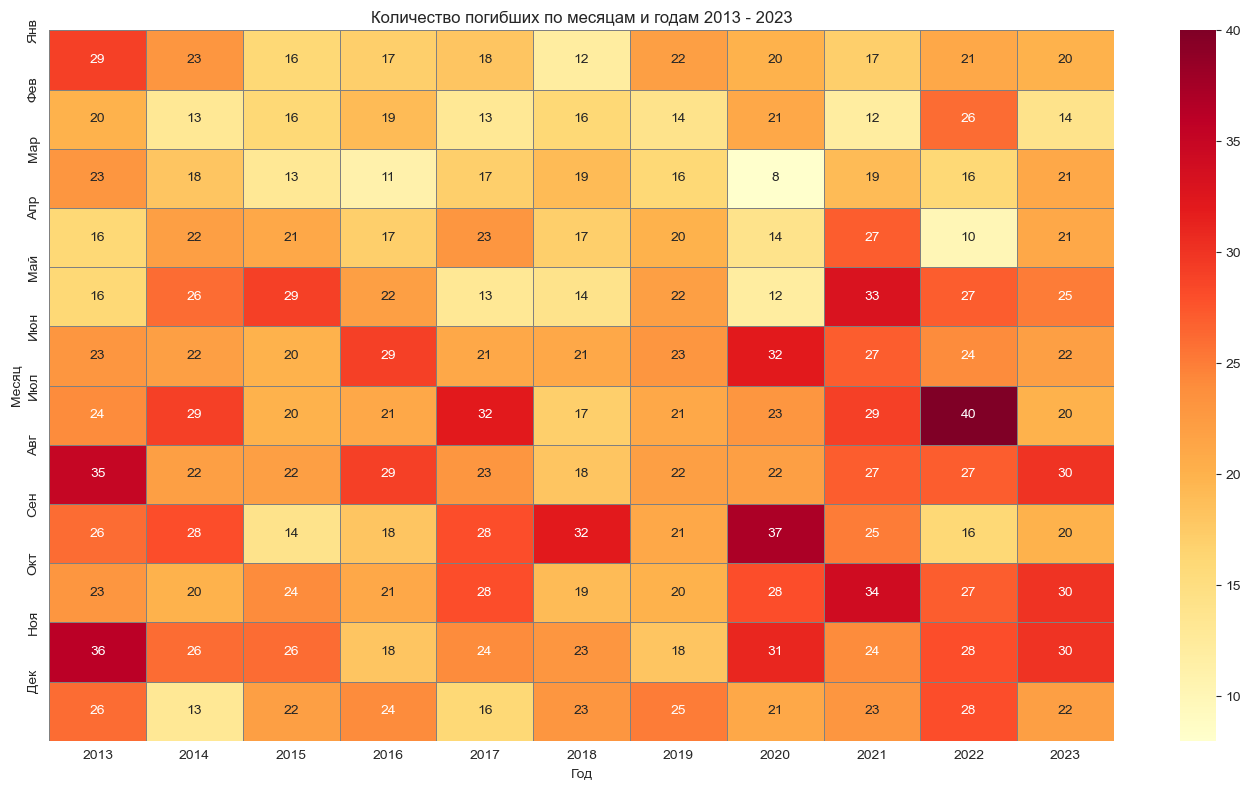

Анализ проведен за период с 2013 по 2023 годы
Исключены данные за 2012 и 2024 годы


In [111]:

# Преобразуем дату в datetime и выделим год и месяц
t61['Дата аварии'] = pd.to_datetime(t61['Дата аварии'], errors='coerce')
t61['Год'] = t61['Дата аварии'].dt.year
t61['Месяц'] = t61['Дата аварии'].dt.month

# Исключаем данные за 2012 и 2024 годы
filtered_data = t61[~t61['Год'].isin([2012, 2024])].copy()

# Группируем по годам и месяцам, считаем сумму пострадавших (только для отфильтрованных данных)
grouped = filtered_data.groupby(['Год', 'Месяц'])['Количество погибших'].sum().reset_index()

# Создаем сводную таблицу для удобства визуализации
pivot_table = grouped.pivot(index='Месяц', columns='Год', values='Количество погибших')

# Сортируем столбцы (годы) в порядке возрастания
pivot_table = pivot_table.sort_index(axis=1)

# Строим тепловую карту для визуализации динамики по годам и месяцам
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title('Количество погибших по месяцам и годам 2013 - 2023')
plt.xlabel('Год')
plt.ylabel('Месяц')

# Добавляем подписи месяцев
month_labels = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 
                'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
plt.yticks(ticks=range(12), labels=month_labels)

plt.tight_layout()
plt.show()

# Дополнительная информация
print("Анализ проведен за период с", int(pivot_table.columns.min()), "по", int(pivot_table.columns.max()), "годы")
print("Исключены данные за 2012 и 2024 годы")

## 5. Гипотезы

### 5.1 Гипотеза 1

- Гипотеза о что что частота аварий наиболее часто происходит в темное время суток и в зимний сезон - опровергнута.
ДТП чаще происходят днём и летом, а не зимой и ночью, как предполагалось.
С мая по июль наблюдается рост аварий, особенно в июле — связано с летними каникулами, молодыми водителями и Днём независимости США (4 июля).

### 5.2 Гипотеза 2

- Гипотеза о том что район Broadway является районом с повышенной аварийностью - подтвердилась.
Также зафиксированы другие улицы с высокой плотностью ДТП, что подтверждает существование "опасных" зон в городе.

### 5.3 Гипотеза 3

- Гипотеза о том, что основные причины аварий является человеческий фактор - подтвердилось.
Так же в 2020 году зафиксировано резкое снижение аварийности из-за COVID-ограничений и снижения трафика.

## 6. Общий вывод

В результате анализа дорожно-транспортных происшествий были выявлены следующие ключевые закономерности:
- Аварии чаще всего происходят в дневное время и в период с середины весны до середины осени. Это связано с ростом транспортной активности, началом каникул и сезоном отпусков.
- Выявлены наиболее аварийные участки дорог, включая конкретные улицы и перекрёстки. Эти данные могут быть использованы для улучшения дорожной инфраструктуры и повышения безопасности на уровне города.
- Основной причиной ДТП остаётся человеческий фактор: невнимательность, нарушение правил, несоблюдение дистанции.
- При этом наблюдается снижение числа пострадавших, но при этом увеличение числа погибших, что говорит о повышении тяжести последствий аварий, несмотря на общее сокращение инцидентов.

## 7. Презентация

Ссылка: https://s15112025.tilda.ws/

## 8. Список литературы:

- Датасет:
1. Motor Vehicle Collisions – Crashes in NYC. Kaggle.
https://www.kaggle.com/datasets/saurabhbadole/motor-vehicle-collisions-crashes-in-nyc

- Статьи и материалы:
2. Car Accident Statistics. Forbes Advisor.
https://www.forbes.com/advisor/legal/auto-accident/car-accident-statistics/

3. Каникулы в США: даты и особенности. eStudy.ru.
https://www.estudy.ru/countries/usa/kanikuly/

4. ЖЖ-блог о жизни в Нью-Йорке: ДТП и городская среда. Сам Себе Сказал.
https://samsebeskazal.livejournal.com/208736.html

5. В США после начала пандемии выросло число смертей на дорогах. RT со ссылкой на WSJ.
https://russian.rt.com/inotv/2020-10-03/WSJ-v-SSHA-posle-nachala?ysclid=mhzv3zoe8b521924096

6. В каком возрасте получают права в Нью-Йорке? DMV Test RU.
https://dmv-test-ru.com/articles/v-kakom-vozraste-poluchayut-prava-v-nyu-york-ssha

7. Районы Нью-Йорка с наибольшей смертностью в ДТП. Stacker.
https://stacker.com/stories/new-york/counties-most-motor-vehicle-accident-fatalities-new-york

